# Introduction:
<br>
The COVID-19 pandemic, also known as the coronavirus pandemic, is an ongoing pandemic of coronavirus disease 2019 (COVID 19) caused by severe acute respiratory syndrome coronavirus 2 (SARS CoV 2). The outbreak was first identified in Wuhan, China, in December 2019. The World Health Organization declared the outbreak a Public Health Emergency of International Concern on 30 January, and a pandemic on 11 March. <br>

The virus is primarily spread between people during close contact, most often via small droplets produced by coughing, sneezing, and talking. The droplets 
usually fall to the ground or onto surfaces rather than travelling through air 
over long distances. Less commonly, people may become infected by touching a 
contaminated surface and then touching their face. It is most contagious during the first three days after the onset of symptoms, although spread is possible before symptoms appear, and from people who do not show symptoms. <br>

Common symptoms include fever, cough, fatigue, shortness of breath, and loss of smell. Complications may include pneumonia and acute respiratory distress syndrome. The time from exposure to onset of symptoms is typically around five days, but may range from two to fourteen days. There is no known vaccine or specific antiviral treatment. Primary treatment is symptomatic and supportive therapy. <br>

Recommended preventive measures include hand washing, covering one's mouth when coughing, maintaining distance from other people, wearing a face mask in public settings, and monitoring and self-isolation for people who suspect they are infected. Authorities worldwide have responded by implementing travel restrictions, lockdowns, workplace hazard controls, and facility closures. Many places have also worked to increase testing capacity and trace contacts of infected persons. <br>

The pandemic has caused severe global socioeconomic disruption including the largest global recession since the Great Depression. It has led to the postponement or cancellation  of sporting, religious, political and cultural events,  widespread supply shortages exacerbated by panic buying, and decreased emissions of pollutants and greenhouse gases. Schools, universities, and colleges have closed either on a nationwide or local basis in 190 countries, affecting approximately 73.5 per cent of the world's student population


# Worldwide COVID-19 Cases Analysis

The dataset is obtained from https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset and https://github.com/owid/covid-19-data/tree/master/public/data .

We shall analyse the dataset on a coutry wise, datewise , continent wise and week wise. 

## Importing Libraries, Datasets and Data Checking

We are importing Pandas and Numpy for Data Analysis, Seaborn, Matplotlib and plotly for data visualization

In [0]:
# Importing packages for analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We import day wise data till May 6 for different countries and also the testing and population details for every country.

In [0]:
# reading covid cases
covid_df1= pd.read_csv('/content/drive/My Drive/Covid data/Worldwide cases/covid_19_data.csv')

In [0]:
# read population details 
popu_world= pd.read_csv('/content/drive/My Drive/Covid data/Worldwide cases/locations.csv')

In [0]:
#read testing data
total_data_world= pd.read_csv('/content/drive/My Drive/Covid data/Worldwide cases/owid-covid-data.csv',usecols=['iso_code','location','date','total_cases','new_cases','total_deaths','new_deaths','total_tests','new_tests','tests_units'])

In [0]:
# Dropping unnecessary columns in covid df1
covid_df1= covid_df1.drop(['SNo','Province/State','Last Update'], axis=1)

In [0]:
# Converting date column to datetime object
covid_df1['ObservationDate']= pd.to_datetime(covid_df1['ObservationDate'])

## Country Wise Analysis

Let us first analyse country wise cumulative cases as on May 6. We do groupby operation on Country Name and take the sum value of the columns.

In [0]:
date= covid_df1[covid_df1['ObservationDate']==  '05/06/2020']
country_df= date.groupby('Country/Region').sum()

In [0]:
country_df.head()

Confirmed  Deaths  Recovered
Country/Region                              
Afghanistan        3392.0   104.0      458.0
Albania             832.0    31.0      595.0
Algeria            4997.0   476.0     2197.0
Andorra             751.0    46.0      521.0
Angola               36.0     2.0       11.0

In [0]:
# Sort the values based on Confirmed cases
country_df=country_df.sort_values(by='Confirmed',ascending= False)

In our dataset, we have only confirmed, recovered and death numbers. We dont have any column indicating the active cases. This is calculated by subtracting the recovered and death numbers from confirmed cases

In [0]:
# Calculating active cases
country_df['Active']=country_df['Confirmed']-country_df['Recovered']-country_df['Deaths']

With different countries having various confirmed cases, to compare the growth or decline in cases, we calaculate the active,recovery and death rate. 

In [0]:
# Calculate Active , Recovery and Death rate
country_df['Active rate']= (country_df['Active']/country_df['Confirmed'])*100
country_df['Recovery rate']= (country_df['Recovered']/country_df['Confirmed'])*100
country_df['Death rate']= (country_df['Deaths']/country_df['Confirmed'])*100

In [0]:
# in testing dataset , we are removing rows which are not necessary
total_data_world=total_data_world[total_data_world['location']!='World']
total_data_world=total_data_world[total_data_world['location']!='International']

We merge the covid dataframe with population and testing dataframe based on Country name

In [0]:
# Mergiong testing and population dataframe
world_case=total_data_world.merge(right=popu_world, on='location')

In [0]:
world_case.fillna(0, inplace=True)

In [0]:
# Grouping based on Country name to obtain country wise testing data
country_wise= world_case.groupby('location').agg({'iso_code':'max','total_tests':'max','population':'max','continent':'max'}). reset_index()

In [0]:
country_df= country_df.reset_index()

In [0]:
# Replace certain country names to ensure that proper merging of the covid dataframe with world case dataframe having testing and population data.
country_df['Country/Region']=country_df['Country/Region'].replace({'US':'United States','UK':'United Kingdom','Mainland China':'China','Congo (Kinshasa)':'Congo','Congo (Brazzaville)':'Congo','Burma':'Myanmar','Cabo Verde':'Cape Verde','Eswatini':'Swaziland','West Bank and Gaza':'Palestine'})
country_wise['location']=country_wise['location'].replace({"Cote d'Ivoire":'Ivory Coast','Timor':'Timor-Leste','Democratic Republic of Congo':'Congo'})

In [0]:
# Merging covid data of country wise to country wise testing data
country_df=country_df.merge(right=country_wise,left_on='Country/Region',right_on='location', how='inner').drop('location', axis=1)

In [0]:
country_df.head()

Country/Region  Confirmed   Deaths  ...  total_tests   population      continent
0   United States  1228603.0  73431.0  ...    7544328.0  331002647.0  North America
1           Spain   220325.0  25857.0  ...    1351130.0   46754783.0         Europe
2           Italy   214457.0  29684.0  ...    2310929.0   60461828.0         Europe
3  United Kingdom   202359.0  30150.0  ...    1072144.0   67886004.0         Europe
4          France   174224.0  25812.0  ...     724574.0   65273512.0         Europe

[5 rows x 12 columns]

In [0]:
# Calculate the affected people in whole population
country_df['% cases in whole population']=(country_df['Confirmed']*100) / country_df['population']
country_df['% deaths in whole population']=(country_df['Deaths']*100) / country_df['population']
country_df['% recovered in whole population']=(country_df['Recovered']*100) / country_df['population']
country_df['% positive cases in testing']=(country_df['Confirmed']*100) / country_df['total_tests']

Now we have prepared the dataset. Let us analyse the top 15 countries with highest confirmed cases.  USA has more cases than Spain, Italy, UK, France and Germany put- together.

In [0]:
# Ploting Confirmed Cases 
data= country_df.iloc[:15]
fig = px.bar(data, x='Country/Region', y='Confirmed', text='Confirmed')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5, textposition='outside')
fig.update_layout(title='Country wise confirmed cases')
fig.show()

On Having a look at the overall world map, almost all countries have been affected by COVID-19 Pandemic and the most affected continents are North America , Europe and Asia since the majority of the cases are from these continents. This map shows the cumulative confirmed cases as of on May 6. 

In [0]:
# Plotting confirmed cases on world map
fig=px.choropleth(country_df,locations='iso_code',color='Confirmed', color_continuous_scale=px.colors.sequential.dense,hover_name='Country/Region')
fig.update_layout(title='Worldwide confirmed cases')
fig.show()

The below plot shows the recovered numbers with color range depicting the recovery rate. On observing the recovery numbers, The USA is the highest in terms of recovered patients. These high numbers are due to high number of confirmed cases in USA. On seeing the recovery rates, despite having high recovery number has less recovery rates. China shows the highest recovery rate with more 90% recovery rate. Germany and Iran are also having higher recovery rates and seems to have controlled the spread of infection.

In [0]:
# Plotting countries with top 15 recovered cases
data= country_df.sort_values(by='Recovered',ascending=False)
data= data.iloc[:15]
fig = px.bar(data, x='Country/Region', y='Recovered', title=' Top 15 countries recovered numbers', color='Recovery rate', text='Recovered')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5, textposition='outside')             
fig.show()

On analysing this plot, all countries are seeing a rise in the number of recovered cases. We see a good number of recovered cases in US, China, Germany, Spain, Iran, Turkey and Brazil. However these numbers don’t indicate the % recovered in these countries.

In [0]:
# Plotting recovered cases world wide
fig=px.choropleth(country_df,locations='iso_code',color='Recovered', color_continuous_scale=px.colors.sequential.Greens,hover_name='Country/Region')
fig.update_layout(title='Worldwide recovered cases')
fig.show()

The plot shows the highest deaths numbers in 15 countries and the colour range shows the death rates in the countries.  The death numbers are high for USA when compared to the other countries, but the death rate is less than 10%. However, in countries like UK, Italy, France, Belgium have high than 10% death rates. 

In [0]:
# Plotting countries with top 15 death cases
data= country_df.sort_values(by='Deaths',ascending=False)
data= data.iloc[:15]
fig = px.bar(data, x='Country/Region', y='Deaths', title=' Top 15 countries death numbers', color='Death rate',text='Deaths')             
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5, textposition='outside')
fig.show()

The plot tells about the death numbers in all countries. US has the highest number of deaths and the total deaths as of May 6th have crossed more than 100k.

In [0]:
# Plotting death cases world wide
fig=px.choropleth(country_df,locations='iso_code',color='Deaths', color_continuous_scale=px.colors.sequential.Reds,hover_name='Country/Region')
fig.update_layout(title='Worldwide dead cases')
fig.show()

The plot shows the countries with highest number of active cases and the colour in the bars represent the active rat in these countries. United States have the highest number of cases and have greater than 75% active cases. Russia, Netherlands and Ecuador, have higher active rates with more than 85 % active rates. Italy , and  Spain are on the path of recovery with active rate less than 45%.

In [0]:
# Plotting countries with top 15 active cases
data= country_df.sort_values(by='Active',ascending=False)
data= data.iloc[:15]
fig = px.bar(data, x='Country/Region', y='Active', title=' Top 15 countries with Active cases', labels={'x':'Countries'}, color='Active rate',text='Active')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5, textposition='outside')             
fig.show()

The plot shows the active cases present as of May 6. Except USA, All countries have active cases less than 150,000 cases.

In [0]:
# Plotting active cases world wide
fig=px.choropleth(country_df,locations='iso_code',color='Active', color_continuous_scale=px.colors.sequential.YlGnBu,hover_name='Country/Region')
fig.update_layout(title='Worldwide Active cases')
fig.show()

The plot shows the countries with the highest number of tests done and the colour range represents the % of positive cases in the testing done. US has the highest number of testing done and still has 15% of testing positive. Russia, India, Australia and South Korea have higher number of testing done when compared to the positive cases. France has the highest % positive cases in testing when considering the total number of tests done.

In [0]:
#Plotting countries with highest testing numbers
data= country_df.sort_values(by='total_tests',ascending=False)
data= data.iloc[:15]
fig = px.bar(data, x='Country/Region', y='total_tests', title=' 15 countries with Highest testings ', color='% positive cases in testing',text='total_tests')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5, textposition='outside')             
fig.show()

Now we investigate the top countries with highest population wise recovery % and death %. The highest % recovered with respect to population of that country is 0.7% and the highest % death is 0.15%. From this we infer that despite the confirmed cases have crossed 3.5 Million, the whole confirmed % of total population is around 0.05%. 

In [0]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("Top 15 Countries - % Recovered in total population","Top 15 Countries - % deaths in total population"))

#Plot % recovered in whole population
data= country_df.sort_values(by='% recovered in whole population',ascending=False)
data= data.iloc[:15]
fig.append_trace(go.Bar(x=data['Country/Region'], y=data['% recovered in whole population'],name='% recovered in whole population', 
                        marker=dict(color='rgba(0, 128, 0, 0.6)',line=dict(color='rgba(0,128,0,1.0)', width=3)),
                        text=data['% recovered in whole population'], textposition='outside'), 1, 1)

#Plot % death in whole population
data= country_df.sort_values(by='% deaths in whole population',ascending=False)
data= data.iloc[:15]
fig.append_trace(go.Bar(x=data['Country/Region'], y=data['% deaths in whole population'],name='% deaths in whole population',
                        marker=dict(color='rgba(255, 0, 0, 0.6)',line=dict(color='rgba(255, 0, 0, 1.0)', width=3)),
                        text=data['% deaths in whole population'], textposition='outside'), 2, 1)
fig.show()

The plot shows the countries having the highest active, recovered and death rates. On seeing the active rates, South Sudan has no recovered cases and has the highest active rate. On the positive front, there are many countries, where there is more than 90% recovered cases and Papua New Guinea has fully recovered cases. Nicaragua has the highest death rate among all countries with 31% death rate. The European Countries such as Italy, France, UK, Belgium, Netherlands are having higher rates of deaths despite having the best health care systems in the world.

In [0]:
fig = make_subplots(rows=3, cols=1,subplot_titles=("Top 15 Countries - Active Rate","Top 15 Countries - Recovery Rate",'Top 15 Countries - Death Rate'))

#Plot Active Rates
data= country_df.sort_values(by='Active rate',ascending=False)
data= data.iloc[:15]
fig.append_trace(go.Bar(x=data['Country/Region'], y=data['Active rate'],name='Active Rate in countries', marker=dict(
        color='rgba(255, 140, 0, 0.6)',
        line=dict(color='rgba(255,140,0,1.0)', width=3) ),text=data['Active rate'], textposition='outside'), 1, 1)

#Plot Recovered rates
data= country_df.sort_values(by='Recovery rate',ascending=False)
data= data.iloc[:15]
fig.append_trace(go.Bar(x=data['Country/Region'], y=data['Recovery rate'],name='Recovery Rate in countries', marker=dict(
        color='rgba(0, 128, 0, 0.6)',
        line=dict(color='rgba(0,128,0,1.0)', width=3) ),text=data['Recovery rate'], textposition='outside'), 2, 1)

#Plot Death Rates
data= country_df.sort_values(by='Death rate',ascending=False)
data= data.iloc[:15]
fig.append_trace(go.Bar(x=data['Country/Region'], y=data['Death rate'],name='Death Rate in countries', marker=dict(
        color='rgba(255, 0, 0, 0.6)',
        line=dict(color='rgba(255,0,0,1.0)', width=3) ),text=data['Death rate'], textposition='outside'), 3, 1)

fig.update_layout(height=1200, width=800)
fig.show()

Let us now analyse the countries where the Active rate is 0. These above countries have less than 20 cases and have a recovery rate greater than 89%.

In [0]:
# Obtaining countries with 0 active cases
country_df[country_df['Active rate']==0.0]

Country/Region  ...  % positive cases in testing
170            Belize  ...                          inf
179          Suriname  ...                          inf
182  Papua New Guinea  ...                          inf

[3 rows x 16 columns]

In the countries where recovery rate is zero, total cases are less than 500 and these countries have a high active rate.

In [0]:
# Obtaining countries with 0 recovered cases
country_df[country_df['Recovery rate']==0.0]

Country/Region  ...  % positive cases in testing
122     Tajikistan  ...                          inf
155    South Sudan  ...                          inf
180        Comoros  ...                          inf

[3 rows x 16 columns]

The plot shows where the recovery rates of countries where death rate is zero segregated by continent wise. It is surprising to a good recovery rate in Africa despite the poor health car facilities and No country from South America and Europe had zero death rates.

In [0]:
# Obtaining countries with 0 dead cases
no_death= country_df[country_df['Death rate']==0.0]. sort_values('Recovery rate',ascending= False)
no_death.style.bar(subset=['Active rate'],color='#ee1f5f').bar(subset=['Recovery rate'], color='lightgreen')


In [0]:
# Ploting recovery rate in countries where death rate is zero
fig=px.bar(no_death,'Country/Region','Recovery rate', color='continent', title='Recovery Rate in countries with no deaths')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside', text='Recovery rate')
fig.show()

Let us consider the countries where there are less than 100 confirmed cases as on 6th May. On average, most of these countries have greater than 40% recovery rate. Many countries from Africa have less than 100 cases and many cases have recovered. 

In [0]:
# Extracting countries with less than 100 cases
less100=country_df[country_df['Confirmed']<100]. sort_values('Active rate', ascending=False)
less100.style.bar(subset=['Active rate'],color='#ffa500').bar(subset=['Recovery rate'], color='#00ff00')

In [0]:
# Plotting recovery rate countries with less than 100 cases 
fig=px.bar(less100,'Country/Region','Recovery rate', color='continent', title='Recovery Rate in countries with less than 100 cases', text='Recovery rate')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

Now Let us see the countries where the confirmed cases are greater than 30000. In these countries, the recovery rate is low, and many active cases are present. Europe has the most active cases in countries having greater 30k confirmed cases.

In [0]:
# Extracting countries with greater than 30000 cases
greater30k=country_df[country_df['Confirmed']>30000]. sort_values('Active rate', ascending=False)
greater30k.style.bar(subset=['Active rate'],color='#ffa500').bar(subset=['Death rate'], color='#ff0000')

In [0]:
# Plotting recovery rate countries with greater than 30000 cases 
fig=px.bar(greater30k,'Country/Region','Active rate', color='continent', text='Active rate', title='Active Rate in countries with greater than 30000 cases')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

## Continent Wise Ananlysis

We can now analyze by grouping wrt continent.

In [0]:
continent_df=country_df.groupby('continent').sum()


We can calculate active rate, recovery rate and death rate to do comparison with other continents. We also calculate % confirmed and % death to understand the severity of the pandemic.

In [0]:
# Calculate Active , Recovery rate, Death rate, % cases in total population
continent_df['Active rate']= 100 *continent_df['Active']/ continent_df['Confirmed']
continent_df['Death rate']= 100 *continent_df['Deaths']/ continent_df['Confirmed']
continent_df['Recovery rate']= 100 *continent_df['Recovered']/ continent_df['Confirmed']
continent_df['% cases in whole population']=(continent_df['Confirmed']*100) / continent_df['population']
continent_df['% deaths in whole population']=(continent_df['Deaths']*100) / continent_df['population']
continent_df['% positive cases in testing']=(continent_df['Confirmed']*100) / continent_df['total_tests']

In [0]:
continent_df

Confirmed  ...  % positive cases in testing
continent                 ...                             
Africa           52610.0  ...                     8.148277
Asia            601961.0  ...                     9.101028
Europe         1492220.0  ...                     8.448933
North America  1343840.0  ...                    15.417958
Oceania           8409.0  ...                     0.990044
South America   254005.0  ...                    23.812202

[6 rows x 13 columns]

This image illustrates the confirmed cases in different continents with shape and colour of the dots represent the active cases. North America and Europe accounts for majority of the cases in the world. Europe has the maximum number with confirmed cases but has lesser number of active when compared to North America which has a bit lesser number of confirmed cases but higher number of active cases. 

In [0]:
fig = px.scatter(continent_df, x=continent_df.index, y="Confirmed",size="Active", color="Active",size_max=60, labels={'x':'Continent'}, title='Confirmed cases in Continents')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5)
fig.show()

This image explains the active cases in the different continents with colour showing the confirmed cases and the size explaining the active rate in the continents. Africa and South America, despite having less confirmed cases have higher active rates. Oceania has the least active rate. North America has the maximum active rate and active number cases.

In [0]:
fig = px.scatter(continent_df, x=continent_df.index, y="Active",size="Active rate", color="Confirmed",size_max=60, labels={'x':'Continent'},title='Active cases in Continents')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5)
fig.show()

This image explains the recovered cases in the different continents with colour showing the confirmed cases and the size explaining the recovered rate in the continents. Oceania has the highest recovered rate. Europe has highest number of recovered cases but on comparing with the recovery rate of Asia, it is less.

In [0]:
fig = px.scatter(continent_df, x=continent_df.index, y="Recovered",size="Recovery rate", color="Confirmed",size_max=60, labels={'x':'Continent'},title='Recovered cases in Continents')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5)
fig.show()


This image explains the death cases in the different continents with colour showing the confirmed cases and the size explaining the death rate in the continents. Europe has the highest death rate and death numbers. The death rates are less in Oceania and Asia.

In [0]:
fig = px.scatter(continent_df, x=continent_df.index, y="Deaths",size="Death rate", color="Confirmed",size_max=60, labels={'x':'Continent'}, title='Death cases in Continents')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5)
fig.show()

This image explains the Testing numbers in the different continents with colour showing the confirmed cases and the size explaining the % positive cases in total testing in the continents. Europe has the highest testing numbers. South America has lowest testing number for the higher number of cases reported. North America has almost 9 million testing and still has 15% positive rate. Asia has nearly 6.6 million tests and has 9% positive cases.

In [0]:
fig = px.scatter(continent_df, x=continent_df.index, y="total_tests",size="% positive cases in testing", color="Confirmed",size_max=60, labels={'x':'Continent'}, title='Continent wise total testing')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5)
fig.show()

## Datewise Analysis

Now let us do analysis based on date wise. We do groupby operation on Date.

In [0]:
date_df= covid_df1.groupby('ObservationDate').sum()

In [0]:
# Calculate active cases
date_df['Active']= date_df['Confirmed']-date_df['Recovered']-date_df['Deaths']

In [0]:
# Converting date columnto datetime object
total_data_world['date']= pd.to_datetime(total_data_world['date'])

In [0]:
# Groupby on testing dataframe based on date
temp=total_data_world.groupby('date').agg({'total_tests':'sum'}).reset_index()

In [0]:
date_df= date_df.reset_index()

In [0]:
#Merging date_df with testing dataframe
date_df=date_df.merge(right=temp, left_on='ObservationDate',right_on='date', how='inner').drop('date', axis=1)

for comparision , we have calculated active rate, recovery rate and death rate

In [0]:
# Calculate Active, Recovery rate, Death rates 
date_df['Active rate']= (date_df['Active']/date_df['Confirmed'])*100
date_df['Recovery rate']= (date_df['Recovered']/date_df['Confirmed'])*100
date_df['Death rate']= (date_df['Deaths']/date_df['Confirmed'])*100

Let us calculate per change in value and % wise in confirmed cases, death, active, recovered and testing numbers

In [0]:
#Calculate the % cases 
for item in ['Confirmed','Deaths','Recovered','Active','total_tests']:
  lis=[]

  for i in range(date_df.shape[0]):
    if i==0:
      lis.append(0)
    else:
      lis.append(100* (date_df[item].iloc[i]-date_df[item].iloc[i-1])/date_df[item].iloc[i])
  if item=='Confirmed':
    date_df['Perday increase% in confirmed']= lis
  if item=='Deaths':
    date_df['Perday increase% in death']= lis
  if item=='Active':
    date_df['Perday increase% in active cases']= lis
  if item=='Recovered':
    date_df['Perday increase% in recovered']= lis
  if item=='total_tests':
    date_df['Perday increase% in testing']=lis


In [0]:
# Calculate per day increase in cases
for item in ['Confirmed','Deaths','Recovered','Active','total_tests']:
  lis=[]

  for i in range(date_df.shape[0]):
    if i==0:
      lis.append(0)
    else:
      lis.append((date_df[item].iloc[i]-date_df[item].iloc[i-1]))
  if item=='Confirmed':
    date_df['Perday increase in confirmed']= lis
  if item=='Deaths':
    date_df['Perday increase in death']= lis
  if item=='Active':
    date_df['Perday increase in active cases']= lis
  if item=='Recovered':
    date_df['Perday increase in recovered']= lis
  if item=='total_tests':
    date_df['Perday increase in testing']=lis

In [0]:
# Removing last row because we are considering till 6th May cases
date_df= date_df.iloc[:-1]

The plot illustrates the Confirmed cases on a daily basis till 6th May, The first 1 M confrimed cases took almost 70 days , but the next Million cases came in 13 days which is almost 5 times lesser doubling rate.

In [0]:
fig=px.bar(date_df,x='ObservationDate',y='Confirmed',text='Confirmed',title='Cumulative Confirmed cases')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

The plot shows the cumulative active cases with color range depicting the active rate. The active cases have seen a dip in the active cases during march first week where the active rate also saw a decline. After March second week, there was a surge in active cases with the active rate rising steadily but after April second week the active rate started to reduce.

In [0]:
fig=px.bar(date_df,x='ObservationDate',y='Active',color='Active rate',text='Active rate',color_continuous_scale=px.colors.sequential.BuPu, title='Cumulative Active Cases')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

This plot represents the cumulative recovered cases and the colour range represents the recovered rate.The recovery numbers are on the rise with the recovery rate also steadily rising which is a good sign

In [0]:
fig=px.bar(date_df,x='ObservationDate',y='Recovered',color='Recovery rate',color_continuous_scale=px.colors.sequential.algae,text='Recovered',title='Cumulative Recovered Cases')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

The plot represents the cumulative death numbers and colour range represents the death rate. The death numbers and the death rate are steadily increasing over the days

In [0]:
fig=px.bar(date_df,x='ObservationDate',y='Deaths',color='Death rate', color_continuous_scale=px.colors.sequential.Oryel, text='Deaths', title= 'Cumulative Death cases')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

This plot reprsents the day wise testing done and the colour range represents the confirmed cases daily. Testing pattern seems to follow mostly upward trend with an average of 70K cases which are confirmed everyday

In [0]:
fig=px.bar(date_df,x='ObservationDate',y='total_tests',text='total_tests',title='Day wise testing done', color='Perday increase in confirmed')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

The plot represents the per day increase in per day cases and the colour range represents the per day increase in percentage of confirmed cases.THe trend seems to follow an erratic curve of sudden spikes and dips with the increase percentage of confirmed cases slightly decreasing everyday

In [0]:
fig=px.bar(date_df,x='ObservationDate',y='Perday increase in confirmed',color='Perday increase% in confirmed', color_continuous_scale=px.colors.sequential.Brwnyl, text='Perday increase in confirmed', title= 'Per Day increase in Confirmed Cases')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

The plot represents the per day increase in active cases and the colour range represents the per day increase percentage in active cases. The cases started to increase in month of February and reduced in the end of February only to see a big growth in active cases and the increase in cases keep varying over the course of time in April

In [0]:
fig=px.bar(date_df,x='ObservationDate',y='Perday increase in active cases',color='Perday increase% in active cases',color_continuous_scale=px.colors.sequential.BuPu, text='Perday increase in active cases', title='Per Day increase in Active cases')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

The plot shows the per day increase in Recovered cases and the colour range represents the per day increase percentage in recovered. There has been a constant increase in per day recovered cases with certain days showing huge surges in recovered cases 

In [0]:
fig=px.bar(date_df,x='ObservationDate',y='Perday increase in recovered',color='Perday increase% in recovered', color_continuous_scale=px.colors.sequential.algae,text='Perday increase in recovered', title='Per day increase in recovered')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

The plot indicated the per day increase in death cases and the colour range represents the perday increase percentage in death. Till march end there is steady rise of cases and rate of increase of deaths also increases. In April, there is decrease in death rates. and has an average of 6k cases everyday with spikes somedays. 

In [0]:
fig= px.bar(date_df,x='ObservationDate',y='Perday increase in death',color='Perday increase% in death',color_continuous_scale=px.colors.sequential.Oryel,text='Perday increase in death', title='Per day increase in death cases' )
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

The plot here represents the per day increase in Testing done and the colour range shows the perday increase percentage in testing. The increase and decrease of testings dont seem to follow any specific pattern.

In [0]:
temp=date_df.iloc[40:]
fig= px.bar(temp,x='ObservationDate',y='Perday increase in testing',color='Perday increase% in testing',text='Perday increase in testing', title='Per day increase in testing done' )
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

In [0]:
# Bucketing of confirmed values in ranges of 100k
n= int(date_df['Confirmed'].iloc[-1]// 100000 )
grp= [ i *100000 for i in range(n+2)]
grp_l= [i+100000 for i in grp][:-1]
date_df['Confirmed Range']= pd.cut(date_df['Confirmed'], bins=grp, labels= grp_l)

In [0]:
# range datagrame is created by aggregating on the Confirmed range
ranges=date_df.groupby('Confirmed Range').agg({'Confirmed':'count'})
ranges=ranges.rename(columns={'Confirmed': 'Time taken to reach 100k'})
lis=[]

for i in range(ranges.shape[0]):
  if i==0:
    lis.append(0)
  else:
    lis.append(100 * (ranges['Time taken to reach 100k'].iloc[i]-ranges['Time taken to reach 100k'].iloc[i-1])/ranges['Time taken to reach 100k'].iloc[i])

ranges['% change']= lis

The plot mentioned below is the time taken to reach 100K confirmed range cases and the colour range indicates the prcentage change. The first 100k confirmed took 44 days whereas the next 100k cases 12 k which is 3 times faster when compared to the first 100k cases and the 3rd 100k cases was 4 times faster than 2nd set of 100 k. The next 100k cases takes an average of 1-2 days to reach 100k cases which is alarming.  

In [0]:
#Plotting time taken to reach 100k confirmed range cases
fig=px.bar(ranges,x=ranges.index,y='Time taken to reach 100k',color='% change', labels={'x':'Confirmed 100k ranges'}, text='Time taken to reach 100k',title='Time taken to reach 100k confirmed range cases')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5, textposition='outside')
fig.show()

In [0]:
# Bucketing the recovered cases into 100k recovered range
n= int(date_df['Recovered'].iloc[-1]// 100000 )
grp= [ i *100000 for i in range(n+2)]
grp_l= [i+100000 for i in grp][:-1]
date_df['Recovered Range']= pd.cut(date_df['Recovered'], bins=grp, labels= grp_l)

In [0]:
# Grouping by the data based on recovered range 
ranges1=date_df.groupby('Recovered Range').agg({'Recovered':'count'})
ranges1=ranges1.rename(columns={'Recovered': 'Time taken to reach 100k'})
lis=[]

for i in range(ranges1.shape[0]):
  if i==0:
    lis.append(0)
  else:
    lis.append(100 * (ranges1['Time taken to reach 100k'].iloc[i]-ranges1['Time taken to reach 100k'].iloc[i-1])/ranges1['Time taken to reach 100k'].iloc[i])

ranges1['% change']= lis

The graph mentioned here is the time taken to reach 100K range in recovered cases and the colour range indicates the percenatge change. The first 100k case took 61 days to recover. However the next 100k people recovered in 10 days which is a huge jump in the recovery rate and the next 100 k cases take an average of 3 days to recover which is greater than the infecting rate which is average of 1 day for every 100k cases 

In [0]:
fig=px.bar(ranges1,x=ranges1.index,y='Time taken to reach 100k',color='% change', labels={'x':'Recovered 100k ranges'},text='Time taken to reach 100k', title='Time taken to reach 100k range recovered cases')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5, textposition='outside')
fig.show()

## Week wise Analysis

Now we analyse per week the active , dead and recovered numbers . We groupby the datafram based on Week number.

In [0]:
# From the date_df, we obtain week number from date
date_df= date_df.reset_index()
date_df['Week']= date_df['ObservationDate'].dt.week

In [0]:
# Obtaining Week wise Confirmed, recovered and death numbers
week= date_df['Week'].unique()
lis=['Confirmed','Recovered','Deaths']
conf=[]
rec=[]
dea=[]
for item in lis:
  for i in week:
    a=date_df[date_df['Week']==i][item].iloc[-1]
    if item== 'Confirmed':
      conf.append(a)
    if item=='Recovered':
      rec.append(a)
    if item=='Deaths':
      dea.append(a)


In [0]:
week_df= pd.DataFrame({'Week': week, 'Confirmed': conf,'Recovered':rec,'Deaths':dea})

In [0]:
# Calculat Active cases
week_df['Active']= week_df['Confirmed']-week_df['Deaths']-week_df['Recovered']

In [0]:
week_df

Week  Confirmed  Recovered    Deaths     Active
0      4     2118.0       52.0      56.0     2010.0
1      5    16787.0      472.0     362.0    15953.0
2      6    40151.0     3244.0     906.0    36001.0
3      7    71226.0    10865.0    1770.0    58591.0
4      8    78985.0    23394.0    2469.0    53122.0
5      9    88371.0    42716.0    2996.0    42659.0
6     10   109835.0    60695.0    3803.0    45337.0
7     11   167447.0    76034.0    6440.0    84973.0
8     12   337122.0    97243.0   14623.0   225256.0
9     13   720140.0   149076.0   33925.0   537139.0
10    14  1272115.0   260012.0   69374.0   942729.0
11    15  1846680.0   421722.0  114089.0  1310869.0
12    16  2401379.0   623903.0  165044.0  1612432.0
13    17  2971475.0   865733.0  206544.0  1899198.0
14    18  3506729.0  1125236.0  247470.0  2134023.0
15    19  3755341.0  1245413.0  263831.0  2246097.0

This shows the week wise active, recovered and death cases. The active, recovered and death numbers show an upward trend. However near week 10, the recovered numbers are higher than active number. But the next week itself, the active cases increase exponentially.

In [0]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=week_df['Week'], y=week_df['Active'],
                    mode='lines', name='Active'))
fig.add_trace(go.Scatter(x=week_df['Week'], y=week_df['Recovered'],
                    mode='lines+markers',
                    name='Recovered'))
fig.add_trace(go.Scatter(x=week_df['Week'], y=week_df['Deaths'],
                    mode='markers',
                    name='Deaths'))
fig.update_layout(title='Week wise cases')
fig.show()

In [0]:
week_df['Active rate']= 100 * week_df['Active']/week_df['Confirmed']
week_df['Recovery rate']= 100 * week_df['Recovered']/week_df['Confirmed']
week_df['Death rate']= 100 * week_df['Deaths']/week_df['Confirmed']

The following represents week wise Active, recovered and death rates. The active rates were the highest and started to decline toward weeks 10 but suddenly increased till week 13 and started slowly declining. The recovery rate rate initially was increasing but the due to increased confirmed cases, recovered rate dropped and after week 13, recovery rate is increasing

In [0]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=week_df['Week'], y=week_df['Active rate'],
                    mode='lines', name='Active rate'))
fig.add_trace(go.Scatter(x=week_df['Week'], y=week_df['Recovery rate'],
                    mode='lines+markers',marker= dict(size=10),
                    name='Recovery rate'))
fig.add_trace(go.Scatter(x=week_df['Week'], y=week_df['Death rate'],
                    mode='markers', marker= dict(size=10),
                    name='Death rate'))
fig.update_layout(title='Weekwise increase in cases')
fig.show()

## Country and Datewise Analysis

Let us analyze the top affected countries and let us the growth in cases everyday. The covid dataframe is grouped on date and country name.

In [0]:
temp=covid_df1.groupby(['ObservationDate','Country/Region']).agg({'Confirmed':'sum'}).apply(lambda x: x[x>0].count(), axis=1). reset_index()
temp= temp.rename(columns={0 :'Count'})

In [0]:
temp=temp.groupby('ObservationDate').sum()

The following graph describes the day wise number of countries affected. There is a small increase in the countries affected till feb mid. But after Feb end till March mid,there has been a steep rise in the no of countries affected.

In [0]:
fig= go.Figure()
fig.add_trace(go.Bar(x=temp.index, y=temp['Count'],opacity= 0.8))
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5)
fig.update_layout(title='Day wise no of countries affected')
fig.show()

In [0]:
#Calculating Active Cases
covid_df1['Active']= covid_df1['Confirmed']- covid_df1['Recovered']- covid_df1['Deaths']

In [0]:
world_case['date']= pd.to_datetime(world_case['date'])
temp=world_case.groupby(['date','location']).agg({'iso_code':'max','total_tests':'max','population':'max','continent':'max'}). reset_index()

In [0]:
# Groupby based on date and Country/region
date_cty_df=covid_df1.groupby(['ObservationDate', 'Country/Region']).sum().reset_index()
date_cty_df.head()

ObservationDate  Country/Region  Confirmed  Deaths  Recovered  Active
0      2020-01-22       Hong Kong        0.0     0.0        0.0     0.0
1      2020-01-22           Japan        2.0     0.0        0.0     2.0
2      2020-01-22           Macau        1.0     0.0        0.0     1.0
3      2020-01-22  Mainland China      547.0    17.0       28.0   502.0
4      2020-01-22     South Korea        1.0     0.0        0.0     1.0

In [0]:
# Replacing countries names so that they can be merged
date_cty_df['Country/Region']=date_cty_df['Country/Region'].replace({'US':'United States','UK':'United Kingdom','Mainland China':'China','Congo (Kinshasa)':'Congo','Congo (Brazzaville)':'Congo','Burma':'Myanmar','Cabo Verde':'Cape Verde','Eswatini':'Swaziland','West Bank and Gaza':'Palestine'})
temp['location']=temp['location'].replace({"Cote d'Ivoire":'Ivory Coast','Timor':'Timor-Leste','Democratic Republic of Congo':'Congo'})

In [0]:
# merging covid datagrame with testing and population data
date_cty_df=date_cty_df.merge(right=temp, left_on=['ObservationDate','Country/Region'],right_on=['date','location'], how='inner').drop(['date','location'],axis=1)

In [0]:
# Aggregating data based on date, countries and respective values in different dataframes of confirrmed, death, recovered and active.
confirmed_df=pd.pivot_table(covid_df1,columns='Country/Region', index='ObservationDate', values='Confirmed',aggfunc='sum').fillna(0).sort_values(max(covid_df1['ObservationDate']).date().strftime('%m/%d/%Y'), axis=1, ascending= False)
death_df=pd.pivot_table(covid_df1,columns='Country/Region', index='ObservationDate', values='Deaths',aggfunc='sum').fillna(0).sort_values(max(covid_df1['ObservationDate']).date().strftime('%m/%d/%Y'), axis=1, ascending= False)
recovered_df=pd.pivot_table(covid_df1,columns='Country/Region', index='ObservationDate', values='Recovered',aggfunc='sum').fillna(0).sort_values(max(covid_df1['ObservationDate']).date().strftime('%m/%d/%Y'), axis=1, ascending= False)
active_df=pd.pivot_table(covid_df1,columns='Country/Region', index='ObservationDate', values='Active',aggfunc='sum').fillna(0).sort_values(max(covid_df1['ObservationDate']).date().strftime('%m/%d/%Y'), axis=1, ascending= False)

The plot clearly indicates the countries with top confirmed cases and the colour represents the number of confirmed cases of the respective country.  US Has an increased rise in cases every day. Russia and UK also a steep rise in cases. In italy, Spain, Germany, there were steep increase in cases initially later it has lesser increase in cases. In India, The rise in cases in April has been tremendous.

In [0]:
fig = go.Figure()
# Add traces
for i in confirmed_df.iloc[:,:16].columns:
  fig.add_trace(go.Scatter(x=confirmed_df.index, y=confirmed_df[i] ,mode='lines+markers',name=i))
fig.update_layout(title='Countries with top Confirmed Cases ')
fig.show()


The plot shows the countries with top active cases and the colour represents the number of cases in respective country. Us tops the number of active cases present. Uk, Russia and Brazil show show a steep rise in Active Cases. However, Countries such as Turkey, Spain, Italy , Germany are showing a decline in active cases after April 15th. Countries such as India, Netherlands are showing a steady rise in active cases. 

In [0]:
fig = go.Figure()
# Add traces
for i in active_df.iloc[:,:16].columns:
  fig.add_trace(go.Scatter(x=active_df.index, y=active_df[i] ,mode='lines+markers',name=i))
fig.update_layout(title='Countries with top Active Cases ')
fig.show()

The plot shows the countries with top death cases and the colour represents the number of cases in respective country. US has the largest death numbers and Italy, Spain , France and UK have almost the same increase in death numbers. 

In [0]:
fig = go.Figure()
# Add traces
for i in death_df.iloc[:,:16].columns:
  fig.add_trace(go.Scatter(x=death_df.index, y=death_df[i] ,mode='lines+markers',name=i))
fig.update_layout(title='Countries with top death Cases ')
fig.show()

The plot shows the countries with top recovered cases and the colour represents the number of cases in respective country. US and Germany have the highest recovered numbers. All the countries are showing a slower rate of recovery numbers and numbers are increasing mainly after april 1st week.

In [0]:
fig = go.Figure()
# Add traces
for i in recovered_df.iloc[:,:16].columns:
  fig.add_trace(go.Scatter(x=recovered_df.index, y=recovered_df[i] ,mode='lines',name=i))
fig.update_layout(title='Countries with top Recovered Cases ')
fig.show()

# India COVID-19 Cases Analysis

The dataset is obtained from https://www.kaggle.com/sudalairajkumar/covid19-in-india.

In this section, we shall focus on Analysing the COVID-19 Situation in India. India has seen almost 52k cases till May 6th. Let us understand the distribution of the cases in India. We shall analyse statewise and datewise and then analyse top states affected datewise.

In [0]:
# Reading the datasets required for analysis
age_group= pd.read_csv('/content/drive/My Drive/Covid data/India Cases/AgeGroupDetails.csv')
pop_ind= pd.read_csv('/content/drive/My Drive/Covid data/India Cases/population_india_census2011.csv')
state_test= pd.read_csv('/content/drive/My Drive/Covid data/India Cases/StatewiseTestingDetails.csv')
indv_details= pd.read_csv('/content/drive/My Drive/Covid data/India Cases/IndividualDetails.csv')
lab_details= pd.read_csv('/content/drive/My Drive/Covid data/India Cases/ICMRTestingLabs.csv')
test_details= pd.read_csv('/content/drive/My Drive/Covid data/India Cases/ICMRTestingDetails.csv')
ind_hosp_bed= pd.read_csv('/content/drive/My Drive/Covid data/India Cases/HospitalBedsIndia.csv')
covid_ind_df= pd.read_csv('/content/drive/My Drive/Covid data/India Cases/covid_19_india.csv')

In [0]:
covid_ind_df.tail()

Sno      Date     Time  ... Cured Deaths Confirmed
1732  1733  08/05/20  8:00 AM  ...   650     29      1123
1733  1734  08/05/20  8:00 AM  ...     2      0        65
1734  1735  08/05/20  8:00 AM  ...    39      1        61
1735  1736  08/05/20  8:00 AM  ...  1250     62      3071
1736  1737  08/05/20  8:00 AM  ...   364    151      1548

[5 rows x 9 columns]

In [0]:
pop_ind.head()

Sno State / Union Territory  ...                  Density  Gender Ratio
0    1           Uttar Pradesh  ...    828/km2 (2,140/sq mi)           912
1    2             Maharashtra  ...      365/km2 (950/sq mi)           929
2    3                   Bihar  ...  1,102/km2 (2,850/sq mi)           918
3    4             West Bengal  ...  1,029/km2 (2,670/sq mi)           953
4    5          Madhya Pradesh  ...      236/km2 (610/sq mi)           931

[5 rows x 8 columns]

## State wise Analysis

In Statewise Analysis , we shall be groupby by State name and merge dataframe with information of testing, testing labs, no of hospitals, no of beds, and population.

In [0]:
# Covid ind dataframe has date and state wise confirmed , 
covid_ind_df['Date']=pd.to_datetime(covid_ind_df['Date'], dayfirst=True)

In [0]:
# Considering Data of states till 6th May 
state= covid_ind_df[covid_ind_df['Date']==  '05/07/2020']
ind_state_df= state.groupby('State/UnionTerritory').sum().reset_index()

In [0]:
ind_state_df= ind_state_df.drop('Sno', axis=1)

In [0]:
# In lab_details dataframe, we are groupby on state and type of lab and finding the count of labs in each state
labs=lab_details.groupby(['state','type']).agg({'lab':'count'}).unstack().reset_index().fillna(0)
labs.columns=labs.columns.droplevel()
labs=labs.rename(columns={'':'state'})
labs['Total']= labs['Collection Site']+labs['Government Laboratory']+labs['Private Laboratory']

In [0]:
#Obtaining the state wise testing numbers
st_test=state_test.groupby('State').agg({'TotalSamples':'sum'}).reset_index()

In [0]:
# merging population with covid cases as temp dataframe
temp=ind_state_df.merge(right=pop_ind,left_on='State/UnionTerritory', right_on='State / Union Territory').drop('State / Union Territory',axis=1)

In [0]:
#  merging temp  with labs as temp datafrme
temp=temp.merge(labs, left_on='State/UnionTerritory',right_on='state', how='left').drop('state',axis=1)

In [0]:
#  merging temp  with testing data as temp datafrme
temp=temp.merge(st_test,left_on='State/UnionTerritory', right_on='State', how='left').drop('State', axis=1)

In [0]:
#  merging temp with hospital bed dataframe 
ind_state_df=temp.merge(ind_hosp_bed, left_on='State/UnionTerritory', right_on='State/UT', how='left').drop(['State/UT','Sno_x','Sno_y'],axis=1)

In [0]:
ind_state_df= ind_state_df.fillna(0).sort_values('Confirmed',ascending=False)
ind_state_df

State/UnionTerritory  ...  NumUrbanBeds_NHP18
18                  Maharashtra  ...             39048.0
9                       Gujarat  ...             20565.0
7                         Delhi  ...             24383.0
26                   Tamil Nadu  ...             37353.0
25                    Rajasthan  ...             10760.0
17               Madhya Pradesh  ...             18819.0
29                Uttar Pradesh  ...             37156.0
1                Andhra Pradesh  ...             16658.0
24                       Punjab  ...             12128.0
31                  West Bengal  ...             58882.0
27                    Telengana  ...                 0.0
12            Jammu and Kashmir  ...                 0.0
14                    Karnataka  ...             49093.0
10                      Haryana  ...              4550.0
4                         Bihar  ...              5936.0
15                       Kerala  ...             21139.0
22                       Odisha  ...             12180.0
13                    Jharkhand  ...              4942.0
5                    Chandigarh  ...               778.0
30                  Uttarakhand  ...              5228.0
6                  Chhattisgarh  ...              4342.0
11             Himachal Pradesh  ...              6734.0
3                         Assam  ...              6198.0
28                      Tripura  ...              3277.0
16                       Ladakh  ...                 0.0
0   Andaman and Nicobar Islands  ...                 0.0
20                    Meghalaya  ...              2487.0
23                   Puducherry  ...              3473.0
8                           Goa  ...              1608.0
19                      Manipur  ...               697.0
21                      Mizoram  ...              1393.0
2             Arunachal Pradesh  ...               268.0

[32 rows x 25 columns]

The bar plot represents statewise confirmed cases till dated 06.05.2020 and the colour range depicts the density.  Maharashtra, Gujarat and Delhi are the top 3 states with most affected cases.

In [0]:
ind_state_df['Density']= ind_state_df['Density'].str.split('/', expand= True)[0]
ind_state_df['Density']= ind_state_df['Density'].str.replace(',','')
ind_state_df['Density']= ind_state_df['Density'].astype('float')
fig = px.bar(ind_state_df, x='State/UnionTerritory', y='Confirmed',text='Confirmed',title='Statewise Confirmed cases as of on 6.5.2020', color='Density', color_continuous_scale=px.colors.sequential.turbid)
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5, textposition='outside')
fig.show()

In [0]:
# Calculating Active Rate, active cases, recovery rate, death rates
ind_state_df['Active']= ind_state_df['Confirmed']-ind_state_df['Cured']-ind_state_df['Deaths']
ind_state_df['Active Rate']= (100 * ind_state_df['Active'])/ind_state_df['Confirmed']
ind_state_df['Recovery Rate']= (100 * ind_state_df['Cured'])/ind_state_df['Confirmed']
ind_state_df['Death Rate']= (100 * ind_state_df['Deaths'])/ind_state_df['Confirmed']
ind_state_df['% Positive cases in testing']= ( 100 * ind_state_df['Confirmed'])/ ind_state_df['TotalSamples']

The bar plot depicts the statewise active cases till dated 06.05.2020 and the colour range shows the active rate. Maharashtra Has the highest Active no of cases where Punjab has the highest active rate.

In [0]:
temp= ind_state_df.sort_values('Active', ascending=False)
fig = px.bar(temp, x='State/UnionTerritory', y='Active',text='Active',title='Statewise Active cases as of on 6.5.2020', color='Active Rate', color_continuous_scale=px.colors.sequential.BuPu)
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5, textposition='outside')
fig.show()

The bar plot indicates the statewise recovered cases as of on 06.05.2020 and the colour range depicts the recovery rate. Maharastra, Rajasthan and Delhi have the highest numbers of recovered cases where as Goa,Himachal Pradesh, Andaman& Nicobar Islands and Kerala

In [0]:
temp= ind_state_df.sort_values('Cured', ascending=False)
fig = px.bar(temp, x='State/UnionTerritory', y='Cured',text='Cured',title='Statewise Recovered cases as of on 6.5.2020', color='Recovery Rate', color_continuous_scale=px.colors.sequential.algae)
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5, textposition='outside')
fig.show()

The bar plot indicates the statewise death cases as of on 06.05.2020 and the colour range depicts the death rate. Maharashtra stands first in the death toll, followed by Gujarat.

In [0]:
temp= ind_state_df.sort_values('Deaths', ascending=False)
fig = px.bar(temp, x='State/UnionTerritory', y='Deaths',text='Deaths',title='Statewise Death cases as of on 6.5.2020', color='Death Rate', color_continuous_scale=px.colors.sequential.Oryel)
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5, textposition='outside')
fig.show()

The bar plot shows the statewise testing cases as of on 06.05.2020 and the colour range indicates the percentage of positive cases in testing. Percentage of positivie cases in testing in Highest in Delhi. 

In [0]:
temp= ind_state_df.sort_values('TotalSamples', ascending=False)
fig = px.bar(temp, x='State/UnionTerritory', y='TotalSamples',text='TotalSamples',title='Statewise Testing cases as of on 6.5.2020', color='% Positive cases in testing')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5, textposition='outside')
fig.show()

The bar plot shows the percentage of people affected with COVID 19 with repect to the state population and the colour range indicated the percentage of active in total population.Delhi has the highest percentage of affected cases with respect to total population.

In [0]:
ind_state_df['% Affected in total population']= (100 * ind_state_df['Confirmed'])/ ind_state_df['Population']
ind_state_df['% Active in total population']= (100 * ind_state_df['Active'])/ ind_state_df['Population']
temp= ind_state_df.sort_values('% Affected in total population', ascending=False)
fig = px.bar(temp, x='State/UnionTerritory', y='% Affected in total population',text='% Affected in total population',title=' State wise Affected in total population', color='% Active in total population', color_continuous_scale= px.colors.sequential.BuPu)
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5, textposition='outside')
fig.show()

The bar diagram depicts the testing labs in different states. Maharashtra has the maximum of number of private and government laboratories



In [0]:
fig=go.Figure()
fig.add_trace(go.Bar(x=ind_state_df['State/UnionTerritory'],y=ind_state_df['Government Laboratory'], name='Government Laboratory'))
fig.add_trace(go.Bar(x=ind_state_df['State/UnionTerritory'],y=ind_state_df['Private Laboratory'], name='Private Laboratory'))
fig.add_trace(go.Bar(x=ind_state_df['State/UnionTerritory'],y=ind_state_df['Collection Site'], name='Collection Site'))
fig.update_layout(barmode='stack',xaxis={'categoryorder':'total descending'}, title=' Testing Labs in different states')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5)
fig.show()

The following bar graph indicates the public health facilities in different states. Uttar Pradesh tops the number of hospitals such as district, sub district, PHC and Community health centre.

In [0]:
fig=go.Figure()
fig.add_trace(go.Bar(x=ind_state_df['State/UnionTerritory'],y=ind_state_df['NumCommunityHealthCenters_HMIS'], name='NumCommunityHealthCenters_HMIS'))
fig.add_trace(go.Bar(x=ind_state_df['State/UnionTerritory'],y=ind_state_df['NumPrimaryHealthCenters_HMIS'], name='NumPrimaryHealthCenters_HMIS'))
fig.add_trace(go.Bar(x=ind_state_df['State/UnionTerritory'],y=ind_state_df['NumSubDistrictHospitals_HMIS'], name='NumSubDistrictHospitals_HMIS'))
fig.add_trace(go.Bar(x=ind_state_df['State/UnionTerritory'],y=ind_state_df['NumDistrictHospitals_HMIS'], name='NumDistrictHospitals_HMIS'))
fig.update_layout(barmode='stack',xaxis={'categoryorder':'total descending'}, title=' Public health Facilities in different states')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1)
fig.show()

The first bar plot shows the total number of hospitals present in each state and the second bar plot shows the total number of beds in each state. West bengal can handle more no of cases based on the no of beds available in their state.

In [0]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("Total Hospital present in Different states","Total no of beds present in Different states"))

fig.append_trace(go.Bar(x=ind_state_df['State/UnionTerritory'],y=ind_state_df['NumUrbanHospitals_NHP18'], name='NumUrbanHospitals_NHP18'), 1, 1)
fig.append_trace(go.Bar(x=ind_state_df['State/UnionTerritory'],y=ind_state_df['NumRuralHospitals_NHP18'], name='NumRuralHospitals_NHP18'), 1, 1)

fig.append_trace(go.Bar(x=ind_state_df['State/UnionTerritory'],y=ind_state_df['NumUrbanBeds_NHP18'], name='NumUrbanBeds_NHP18'), 2, 1)
fig.append_trace(go.Bar(x=ind_state_df['State/UnionTerritory'],y=ind_state_df['NumRuralBeds_NHP18'], name='NumRuralBeds_NHP18'), 2, 1)

fig.update_layout(height=1100)
fig.show()

## Datewise cases in India Analysis

In [0]:
ind_date_df=covid_ind_df.groupby('Date').sum().reset_index().drop('Sno', axis=1)

In [0]:
temp=total_data_world[total_data_world['location']=='India']
temp=temp[['date','total_tests']].fillna(0).iloc[:-1]
temp['date']= pd.to_datetime(temp['date'])

In [0]:
ind_date_df=ind_date_df.merge(temp,left_on='Date',right_on='date').drop('date', axis=1)

In [0]:
ind_date_df

Date  Cured  Deaths  Confirmed  total_tests
0  2020-01-30      0       0          1          0.0
1  2020-01-31      0       0          1          0.0
2  2020-02-01      0       0          2          0.0
3  2020-02-02      0       0          3          0.0
4  2020-02-03      0       0          3          0.0
..        ...    ...     ...        ...          ...
92 2020-05-02   9951    1218      37157     976363.0
93 2020-05-03  10887    1306      40124    1046450.0
94 2020-05-04  11762    1389      42836    1107233.0
95 2020-05-05  13161    1583      46711    1191946.0
96 2020-05-06  14183    1694      49391    1276781.0

[97 rows x 5 columns]

In [0]:
ind_date_df['Active']= ind_date_df['Confirmed']-ind_date_df['Cured']-ind_date_df['Deaths']
ind_date_df['Active rate']= (ind_date_df['Active'] *100)/ ind_date_df['Confirmed']
ind_date_df['Recovery rate']= (ind_date_df['Cured'] *100)/ ind_date_df['Confirmed']
ind_date_df['Death rate']= (ind_date_df['Deaths'] *100)/ ind_date_df['Confirmed']

In [0]:
ind_date_df['Increase in active cases']= ind_date_df['Active'].diff().fillna(ind_date_df['Active'])
ind_date_df['Increase in recovered cases']= ind_date_df['Cured'].diff().fillna(ind_date_df['Cured'])
ind_date_df['Increase in deaths cases']= ind_date_df['Deaths'].diff().fillna(ind_date_df['Deaths'])
ind_date_df['Increase in Confirmed cases']= ind_date_df['Confirmed'].diff().fillna(ind_date_df['Confirmed'])
ind_date_df['Increase in testing']= ind_date_df['total_tests'].diff().fillna(ind_date_df['total_tests'])

In [0]:
ind_date_df.head()
ind_date_df.loc[80,'total_tests']=449810
ind_date_df.loc[82,'total_tests']=500542

The following bar chart represents the cumulative confirmed cases.

In [0]:
fig=px.bar(ind_date_df,x='Date',y='Confirmed', title='Cumulative Confirmed Cases')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

The following bar chart represents the cumulative active cases and the colour range indicates the active rate.

In [0]:
fig=px.bar(ind_date_df,x='Date',y='Active',color='Active rate',color_continuous_scale=px.colors.sequential.BuPu, title='Cumulative Active Cases')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

The following bar chart represents the cumulative recovered cases and the colour range indicates the recovered rate.

In [0]:
fig=px.bar(ind_date_df,x='Date',y='Cured',color='Recovery rate',color_continuous_scale=px.colors.sequential.algae,title='Cumulative Recovered Cases')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

The following bar chart represents the cumulative death cases and the colour range indicates the death rate.

In [0]:
fig=px.bar(ind_date_df,x='Date',y='Deaths',color='Death rate', color_continuous_scale=px.colors.sequential.Oryel, title= 'Cumulative Death cases')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

The bar chart represents the cumulative testing done and the colour range indicates the increase in confirmed cases.

In [0]:
fig=px.bar(ind_date_df,x='Date',y='total_tests',title='Cumulative testing done', color='Increase in Confirmed cases')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

In [0]:
for item in ['Confirmed','Deaths','Cured','Active','total_tests']:
  lis=[]

  for i in range(ind_date_df.shape[0]):
    if i==0:
      lis.append(0)
    else:
      lis.append(100* (ind_date_df[item].iloc[i]-ind_date_df[item].iloc[i-1])/ind_date_df[item].iloc[i])
  if item=='Confirmed':
    ind_date_df['Perday increase% in confirmed']= lis
  if item=='Deaths':
    ind_date_df['Perday increase% in death']= lis
  if item=='Active':
    ind_date_df['Perday increase% in active cases']= lis
  if item=='Cured':
    ind_date_df['Perday increase% in recovered']= lis
  if item=='total_tests':
    ind_date_df['Perday increase% in testing']=lis
ind_date_df.fillna(0, inplace=True)

The bar chart which is given below indicates the per day confirmed cases and the colour range shows the per day increase percentage in confirmed cases.

In [0]:
fig=px.bar(ind_date_df,x='Date',y='Increase in Confirmed cases', title='Per day in Confirmed Cases',color='Perday increase% in confirmed', color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

The bar chart which is given below indicates the per day active cases and the colour range shows the per day increase percentage in active cases.

In [0]:
fig=px.bar(ind_date_df,x='Date',y='Increase in active cases', title='Per day Active Cases',color='Perday increase% in active cases', color_continuous_scale=px.colors.sequential.BuPu)
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

The bar chart which is given below indicates the per day recovered cases and the colour range shows the per day increase percentage in recovered.

In [0]:
fig=px.bar(ind_date_df,x='Date',y='Increase in recovered cases', title='Per day Recovered Cases',color='Perday increase% in recovered', color_continuous_scale=px.colors.sequential.algae)
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

The bar chart which is given below indicates the per day death cases and the colour range shows the per day increase percentage in death.

In [0]:
fig=px.bar(ind_date_df,x='Date',y='Increase in deaths cases', title='Per day death Cases',color='Perday increase% in death', color_continuous_scale=px.colors.sequential.Oryel)
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5,textposition='outside')
fig.show()

The following area chart represents the death rates in India.

In [0]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=ind_date_df['Date'], y=ind_date_df['Death rate'], fill= 'tonexty', fillcolor='red', line=dict(color='red')))
fig.update_layout(title= 'Death rates in India', xaxis_title='Date', yaxis_title='Death Rate')

The following area chart gives us the information of recovered rates in India.

In [0]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=ind_date_df['Date'], y=ind_date_df['Recovery rate'], fill= 'tonexty', fillcolor='green',line= dict(color= 'green', dash='dash'), opacity=0.2))
fig.update_layout(title= 'Recovered rates in India', xaxis_title='Date', yaxis_title='Recovered Rate')

In [0]:
n= int(ind_date_df['Confirmed'].iloc[-1]// 10000 )
grp= [ i *10000 for i in range(n+2)]
grp_l= [i+10000 for i in grp][:-1]
ind_date_df['Confirmed Range']= pd.cut(ind_date_df['Confirmed'], bins=grp, labels= grp_l)

In [0]:
ranges=ind_date_df.groupby('Confirmed Range').agg({'Confirmed':'count'})
ranges=ranges.rename(columns={'Confirmed': 'Time taken to reach 10k'})
lis=[]

for i in range(ranges.shape[0]):
  if i==0:
    lis.append(0)
  else:
    lis.append(100 * (ranges['Time taken to reach 10k'].iloc[i]-ranges['Time taken to reach 10k'].iloc[i-1])/ranges['Time taken to reach 10k'].iloc[i])

ranges['% change']= lis

The bar chart indicates the time taken to reach 10K confirmed range cases and the colour range represents the percentage change.

In [0]:
fig=px.bar(ranges,x=ranges.index,y='Time taken to reach 10k',color='% change', labels={'x':'Confirmed 10k ranges'}, text='Time taken to reach 10k',title='Time taken to reach 10k confirmed range cases', width=600)
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5, textposition='outside')
fig.show()

## Date and Statewise Analysis

In [0]:
temp=covid_ind_df.groupby(['Date','State/UnionTerritory']).agg({'Confirmed':'sum'}).apply(lambda x: x[x>0].count(), axis=1). reset_index()
temp= temp.rename(columns={0 :'Count'})

In [0]:
temp=temp.groupby('Date').sum()[:-2]

The bar chart depicts the day wise number of states affected

In [0]:
fig= go.Figure()
fig.add_trace(go.Bar(x=temp.index, y=temp['Count'],opacity= 0.8))
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5)
fig.update_layout(title='Day wise no of states affected')
fig.show()

In [0]:
covid_ind_df['Active']=covid_ind_df['Confirmed']-covid_ind_df['Cured']- covid_ind_df['Deaths']

In [0]:
confirmed_df1=pd.pivot_table(covid_ind_df,columns='State/UnionTerritory', index='Date', values='Confirmed',aggfunc='sum').fillna(0).sort_values('2020-05-06',axis=1, ascending=False)[:-2]
active_df1=pd.pivot_table(covid_ind_df,columns='State/UnionTerritory', index='Date', values='Active',aggfunc='sum').fillna(0).sort_values('2020-05-06',axis=1, ascending=False)[:-2]
recovered_df1=pd.pivot_table(covid_ind_df,columns='State/UnionTerritory', index='Date', values='Cured',aggfunc='sum').fillna(0).sort_values('2020-05-06',axis=1, ascending=False)[:-2]
death_df1=pd.pivot_table(covid_ind_df,columns='State/UnionTerritory', index='Date', values='Deaths',aggfunc='sum').fillna(0).sort_values('2020-05-06',axis=1, ascending=False)[:-2]                                                                                                                                  

The plot represents the top 6 state confirmed numbers till 06.05.2020 and colour represents the confirmed numbers of respective state .

In [0]:
fig = go.Figure()
# Add traces
for i in confirmed_df1.iloc[:,:7].columns:
  fig.add_trace(go.Scatter(x=confirmed_df1.index, y=confirmed_df1[i] ,mode='lines+markers',name=i))
fig.add_trace(go.Scatter(x=['2020-03-25','2020-03-25'],y=[0,16000], line=dict(color='black'), mode='lines',name='Lockdown1'))
fig.add_trace(go.Scatter(x=['2020-04-15','2020-04-15'],y=[0,16000], line=dict(color='brown'), mode='lines',name='Lockdown2'))
fig.add_trace(go.Scatter(x=['2020-05-04','2020-05-04'],y=[0,16000], line=dict(color='grey'), mode='lines',name='Lockdown3'))
fig.update_layout(yaxis_type='log', title='Top 6 States Confirmed numbers till 6.5.2020')
fig.show()

The plot represents the top 6 state active numbers till 06.05.2020 and colour represents the active numbers of respective state .

In [0]:
fig = go.Figure()
# Add traces
for i in active_df1.iloc[:,:7].columns:
  fig.add_trace(go.Scatter(x=active_df1.index, y=active_df1[i] ,mode='lines+markers',name=i))
fig.add_trace(go.Scatter(x=['2020-03-25','2020-03-25'],y=[0,12000], line=dict(color='black'), mode='lines',name='Lockdown1'))
fig.add_trace(go.Scatter(x=['2020-04-15','2020-04-15'],y=[0,12000], line=dict(color='brown'), mode='lines',name='Lockdown2'))
fig.add_trace(go.Scatter(x=['2020-05-04','2020-05-04'],y=[0,12000], line=dict(color='grey'), mode='lines',name='Lockdown3'))
fig.update_layout(title='Top 6 States Active numbers till 6.5.2020')
fig.show()

The plot represents the top 6 state recovered numbers till 06.05.2020 and colour represents the recovered numbers of respective state .

In [0]:
fig = go.Figure()
# Add traces
for i in recovered_df1.iloc[:,:7].columns:
  fig.add_trace(go.Scatter(x=recovered_df1.index, y=recovered_df1[i] ,mode='lines+markers',name=i))
fig.add_trace(go.Scatter(x=['2020-03-25','2020-03-25'],y=[0,3000], line=dict(color='black'), mode='lines',name='Lockdown1'))
fig.add_trace(go.Scatter(x=['2020-04-15','2020-04-15'],y=[0,3000], line=dict(color='brown'), mode='lines',name='Lockdown2'))
fig.add_trace(go.Scatter(x=['2020-05-04','2020-05-04'],y=[0,3000], line=dict(color='grey'), mode='lines',name='Lockdown3'))
fig.update_layout(title='Top 6 States recovered numbers till 6.5.2020')
fig.show()

The plot represents the top 6 state death numbers till 06.05.2020 and colour represents the death numbers of respective state .

In [0]:
fig = go.Figure()
# Add traces
for i in death_df1.iloc[:,:7].columns:
  fig.add_trace(go.Scatter(x=death_df1.index, y=death_df1[i] ,mode='lines+markers',name=i))
fig.add_trace(go.Scatter(x=['2020-03-25','2020-03-25'],y=[0,700], line=dict(color='black'), mode='lines',name='Lockdown1'))
fig.add_trace(go.Scatter(x=['2020-04-15','2020-04-15'],y=[0,700], line=dict(color='brown'), mode='lines',name='Lockdown2'))
fig.add_trace(go.Scatter(x=['2020-05-04','2020-05-04'],y=[0,700], line=dict(color='grey'), mode='lines',name='Lockdown3'))
fig.update_layout(title='Top 6 States death numbers till 6.5.2020')
fig.show()

# Effect of COVID-19

## Policies implemented in various countries

The dataset used in this section: http://www.oecd.org/coronavirus/en/#data 

In [0]:
containment_df= pd.read_csv('/content/drive/My Drive/Covid data/Policy responses by country/COVID 19 Containment measures data.csv')

In [0]:
containment_df.head()
containment_df['Keywords']=containment_df['Keywords'].dropna()

In [0]:
!pip install wordcloud

The words which have caused the socio ecomonic disturbances

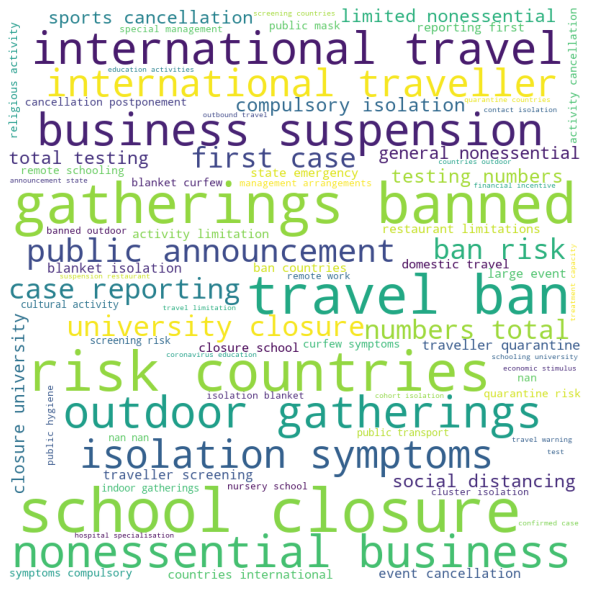

In [0]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in containment_df['Keywords']: 
	val = str(val) 
	tokens = val.split() 
	
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


In [0]:
policy= pd.read_excel('/content/drive/My Drive/Covid data/Policy responses by country/CoronavirusUpdate_AllCountries_Public.xlsx', sheet_name='Country Updates',header=1)

In [0]:
policy.head()

Unnamed: 0  ...                              4.B. Support to firms
0                              NaN  ...                                        Description
1                              NaN  ...  Please present other measures which do not hav...
2  Links to other policy trackers:  ...                                                NaN
3                              ALB  ...                                                NaN
4                              AGO  ...                                                NaN

[5 rows x 19 columns]

In [0]:
policy= policy.drop([0,1,2,88,101,102],axis=0)

In [0]:
lis=[]
for i in policy.columns.str.split('.'):
  lis.append(i[-1].strip(' '))
lis[0]='Country Code'
lis[1]= 'Date Updated'
policy.columns=lis

In [0]:
policy1=policy[['Country Code','Date Updated']]
lis=policy.columns
lis=lis.drop(['Country Code','Date Updated'])
for item in lis:
  policy1[item]= policy[item].isnull().map({False:1, True:0})

In [0]:
policy1['Containent measures']=policy1['Confinement & lock-downs']+policy1['Travel bans & restrictions']+policy1['Closure of schools']+policy1['Cancellation of public events/Closure of public places']+policy1['Obligatory shut-down of economic activities']
policy1['Fiscal Measures']=policy1['Overall fiscal measures']+policy1['Health system measures']+policy1['Income support measures for individuals and households, excluding tax and contribution changes']+policy1['Tax and contribution policy changes']+policy1['Public sector subsidies to businesses']+policy1['Deferral of taxes and social security contributions and bringing-forward expenditures within current fiscal year']+policy1['Public sector loans or capital injections to businesses']+policy1['Loan guarantees by the state, benefiting private borrowers']
policy1['Monetary policy and prudential regulation']= policy1['Monetary policy']+policy1['Prudential regulation']
policy1['Measures to promote burden-sharing within the private sector']= policy1['Support to firms']+policy1['Support to individuals & households']

In [0]:
policy1['Date Updated']= policy1['Date Updated'].str.split('(', expand=True)[0]
policy1.style.background_gradient(cmap='Blues')

In [0]:
world_policy=country_df.merge(policy1, left_on='iso_code',right_on='Country Code').drop(['Country Code','Date Updated','% cases in whole population','% deaths in whole population','% recovered in whole population','% positive cases in testing'], axis=1)

The below given plots represent the number of different countries adhering to different protective and other measures .

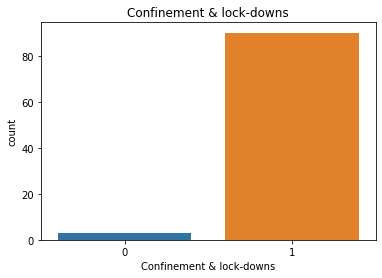

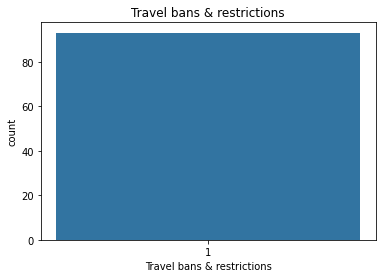

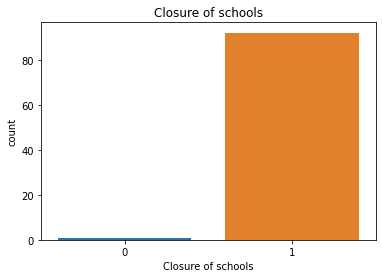

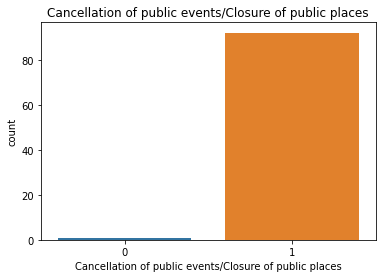

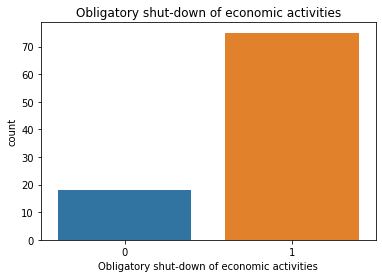

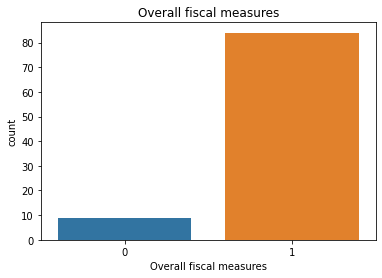

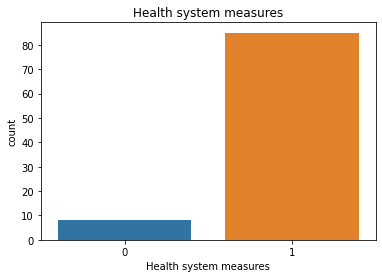

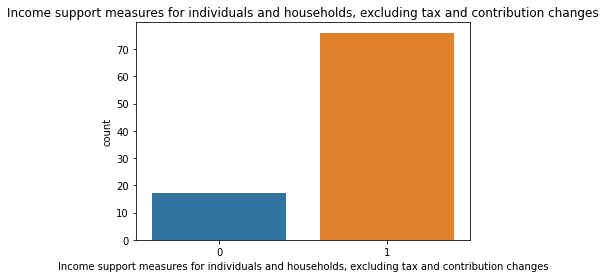

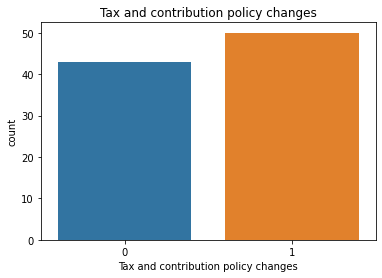

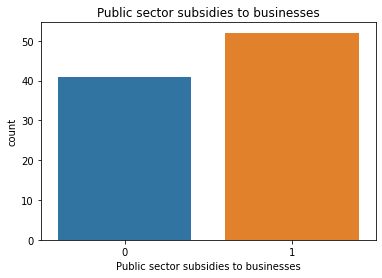

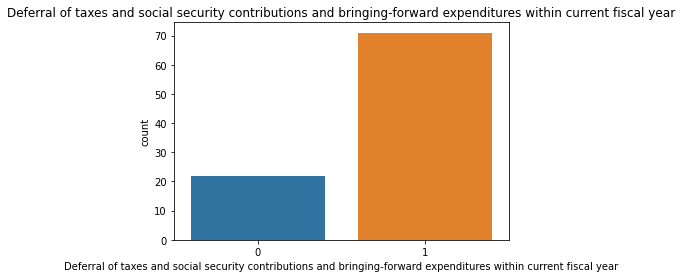

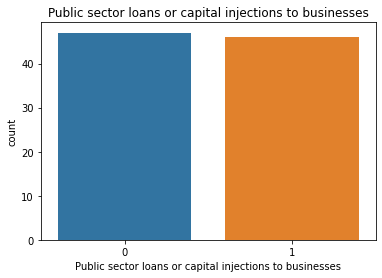

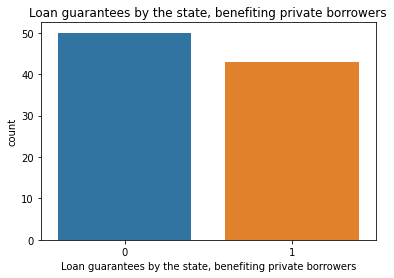

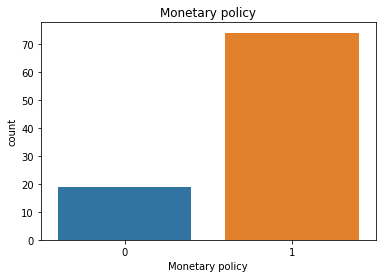

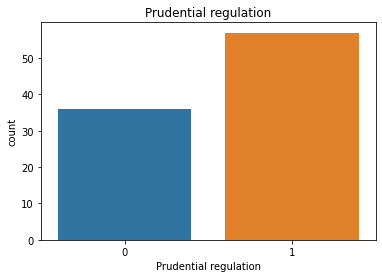

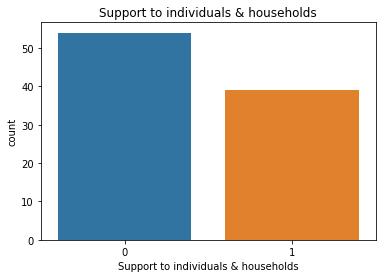

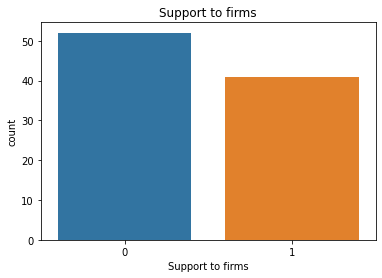

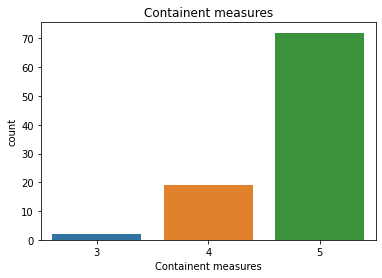

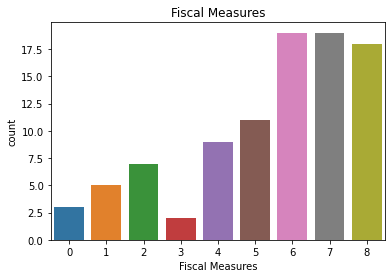

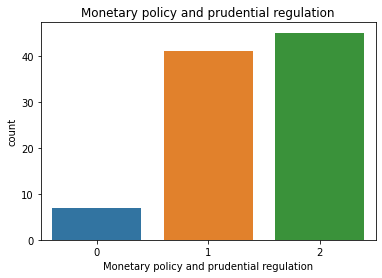

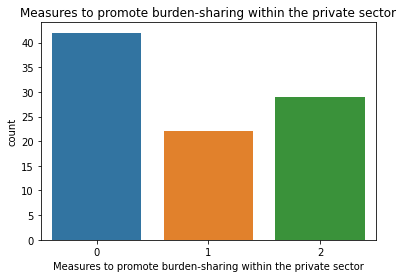

In [0]:
lis=policy1.columns
lis=lis.drop(['Country Code','Date Updated'])
for item in lis:
  sns.countplot(world_policy[item])
  plt.title(item)
  plt.show()

The bar chart shows the active rate in countries having stringent containment measures and the colour range indicates the population.

In [0]:
temp=world_policy[world_policy['Containent measures']== 5][:20]
fig = px.bar(temp, x='Country/Region', y='Active rate',title='Top Containment measures vs Active Rate', text='Active rate', color='population')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5, textposition='outside')
fig.show()

The below given box plot explains the spread of active cases with respect to severity of containment measures .

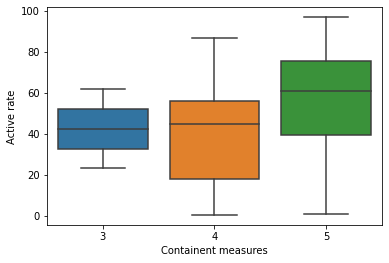

In [0]:
sns.boxplot(x=world_policy['Containent measures'],y=world_policy['Active rate'])

The bar chart shows the active rate in countries having the highest fiscal measures.

In [0]:
temp=world_policy[world_policy['Fiscal Measures']== 8][:20]
fig = px.bar(temp, x='Country/Region', y='Active rate',title='Top Fiscal measures vs Active Rate', text='Active rate')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5, textposition='outside')
fig.show()

The below given box plot explains the spread of active rates with respect to severity of fiscal measures

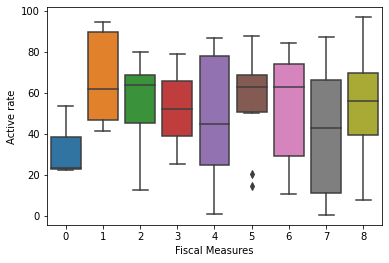

In [0]:
sns.boxplot(x=world_policy['Fiscal Measures'],y=world_policy['Active rate'])

The bar chart shows the active rate in countries having the highest measures to promote burden sharing within the private sector.

In [0]:
temp=world_policy[world_policy['Measures to promote burden-sharing within the private sector']== 2][:20]
fig = px.bar(temp, x='Country/Region', y='Active rate',title='Measures to promote burden-sharing within the private sector vs Active Rate', text='Active rate')
fig.update_traces(marker_line_color= 'rgb(0,0,0)',marker_line_width=1.5, textposition='outside')
fig.show()

The given below box chart shows the spread of active rate with respect to measures to promote burden sharing with the private sector.

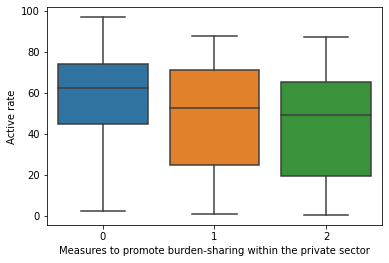

In [0]:
sns.boxplot(x=world_policy['Measures to promote burden-sharing within the private sector'],y=world_policy['Active rate'])

## Employment Policy

In [0]:
employ_policy=pd.read_excel('/content/drive/My Drive/Covid data/Policy responses by country/Covid-19-Employment-and-Social-Policy-Responses-by-Country.xlsx', sheet_name='Summary', header=3)

In [0]:
employ_policy= employ_policy.drop([37,38])

In [0]:
employ_policy=employ_policy[:46]

In [0]:
employ_policy['OECD countries']= employ_policy['OECD countries'].str.split('\n', expand=True)[0]
employ_policy['OECD countries']=employ_policy['OECD countries'].str.strip(' ')

In [0]:
employ_policy1=employ_policy[['OECD countries','Last update']]
lis=employ_policy.columns
lis=lis.drop(['OECD countries','Last update'])
for item in lis:
  employ_policy1[item]= employ_policy[item].isnull().map({False:1, True:0})

In [0]:
employ_policy1.head()

OECD countries  ... Helping economically insecure workers stay in their homes 
0      Australia  ...                                                  1        
1        Austria  ...                                                  0        
2        Belgium  ...                                                  1        
3         Canada  ...                                                  1        
4          Chile  ...                                                  0        

[5 rows x 12 columns]

The plots given below indicates the different employment policies implemented.

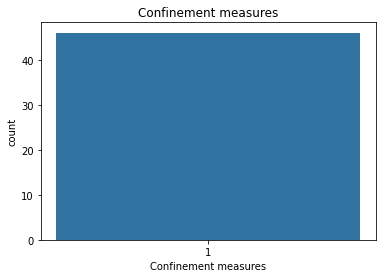

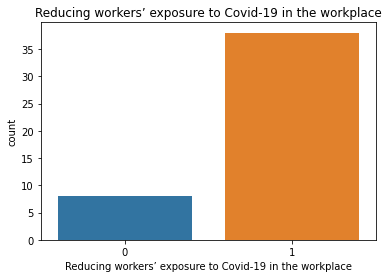

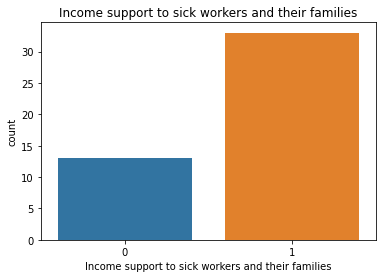

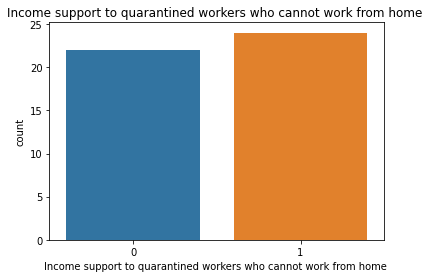

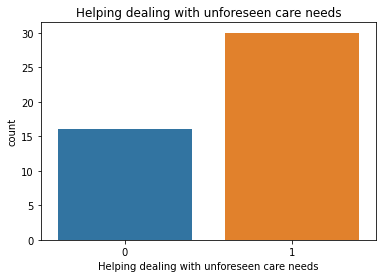

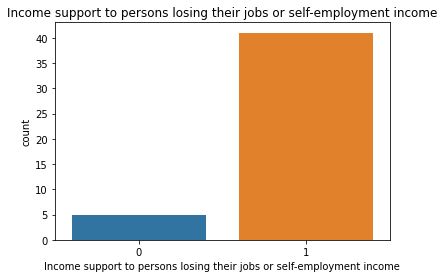

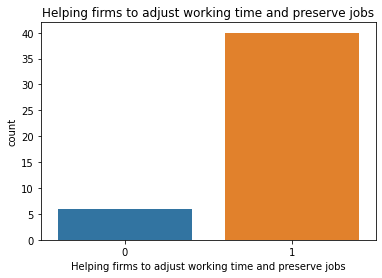

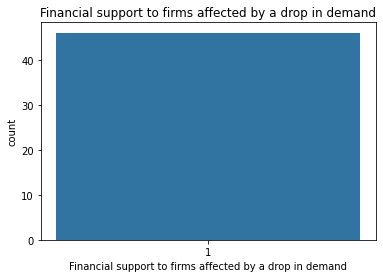

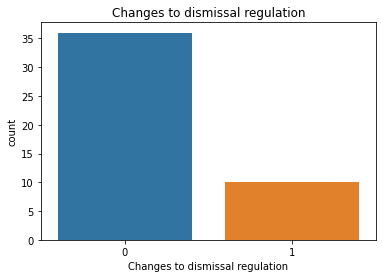

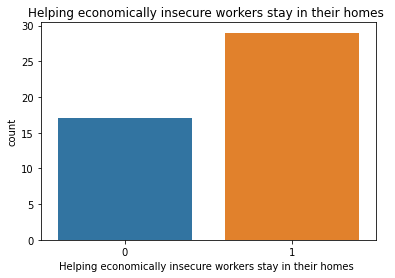

In [0]:
for item in lis:
  sns.countplot(employ_policy1[item])
  plt.title(item)
  plt.show()

In [0]:
world_emp_policy= country_df.merge(employ_policy1, left_on='Country/Region',right_on='OECD countries')

The given strip plots indicates the spread of active rates with respect to different employment policies.

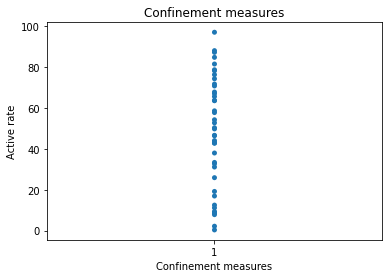

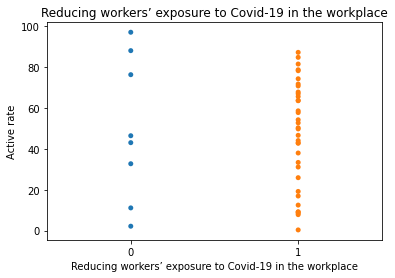

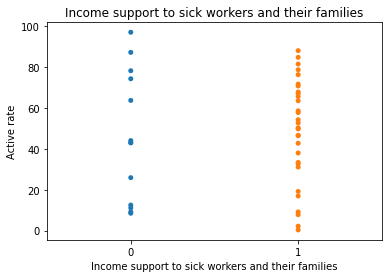

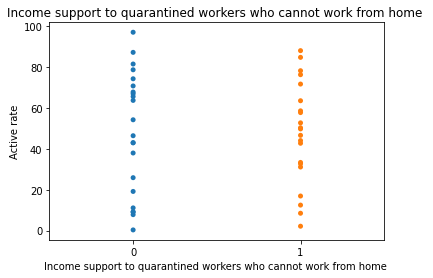

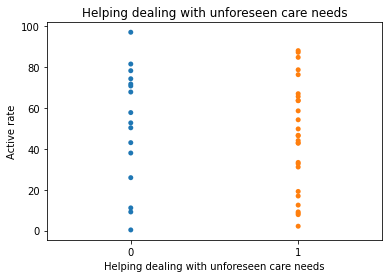

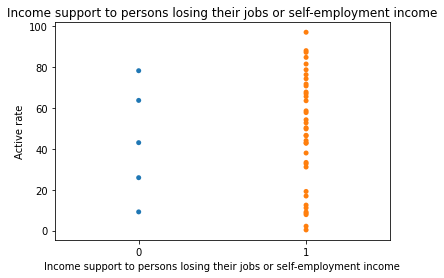

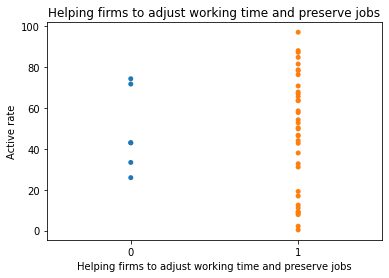

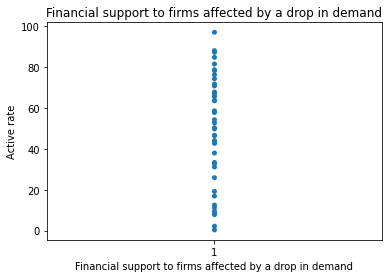

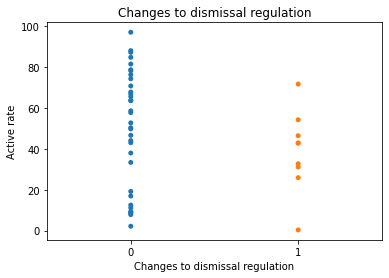

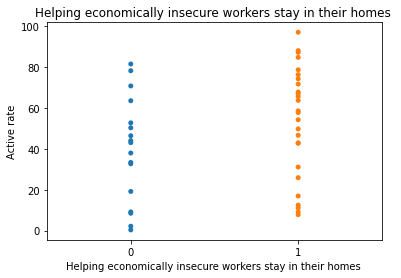

In [0]:
for item in lis:
  sns.stripplot(x=world_emp_policy[item],y= world_emp_policy['Active rate'],jitter=False)
  plt.title(item)
  plt.show()

## Health Policies by Various Countries

In [0]:
health_policy= pd.read_excel('/content/drive/My Drive/Covid data/Health Policy/COVID19-OECD-Health-System-Response-Tracker.xlsx',sheet_name='Country coverage', header=4)

In [0]:
health_policy= health_policy.fillna(0)

In [0]:
health_policy.head()

Country  ...  Additional funding/financing for the health system
0                 Argentina  ...                                                0.0 
1                 Australia  ...                                                0.0 
2                   Austria  ...                                                0.0 
3                  Belgium   ...                                                1.0 
4  Brazil\n(national level)  ...                                                0.0 

[5 rows x 10 columns]

The bar plots represents the count of differnet countries implementing various medical policies.

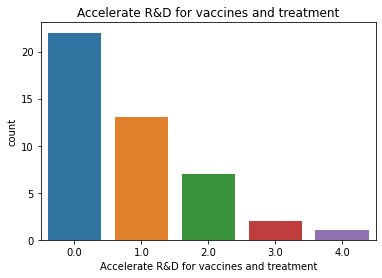

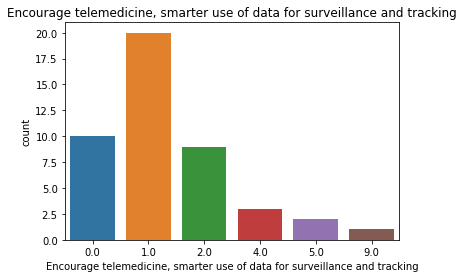

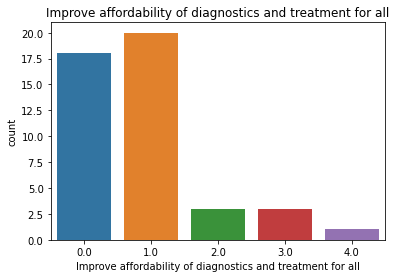

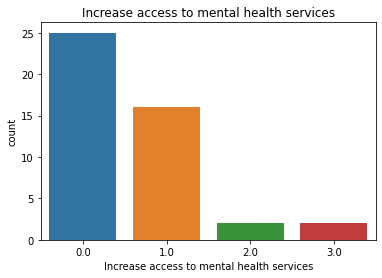

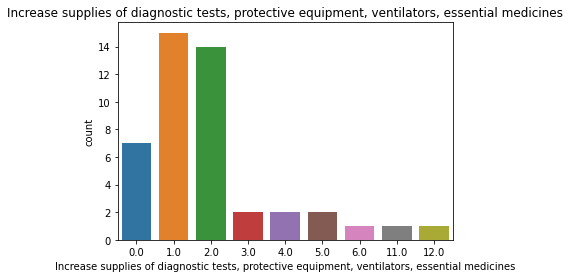

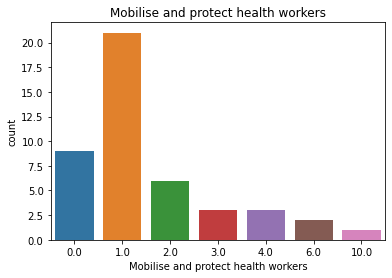

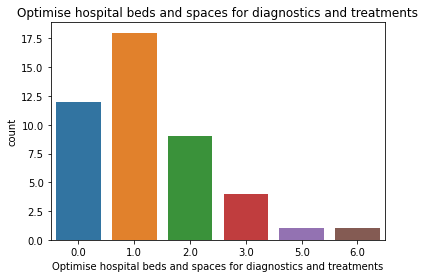

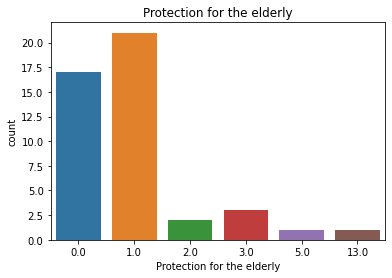

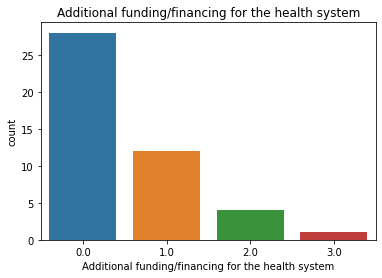

In [0]:
lis= health_policy.columns
lis=lis.drop('Country')
for item in lis:
  sns.countplot(health_policy[item])
  plt.title(item)
  plt.show()

In [0]:
health_policy['Country']= health_policy['Country'].str.split('\n',expand= True)[0]
health_policy['Country']= health_policy['Country'].str.strip(' ')

In [0]:
health_policy1=country_df.merge(health_policy, left_on='Country/Region',right_on='Country').drop('Country', axis=1)

The below given Violin plots shows the spread of active rates in respect of health policies.

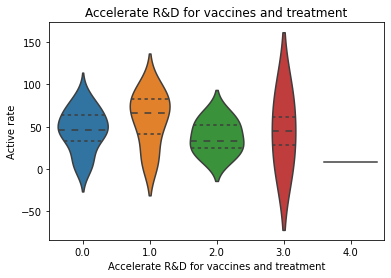

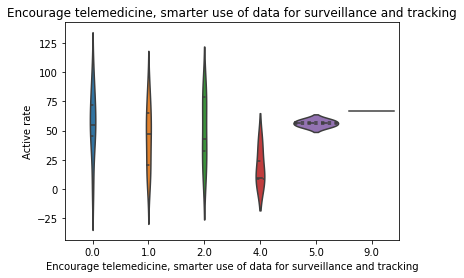

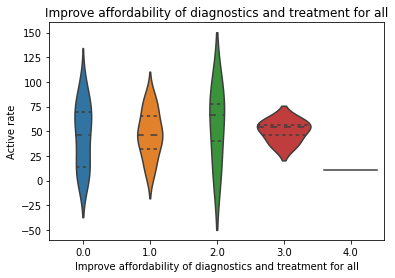

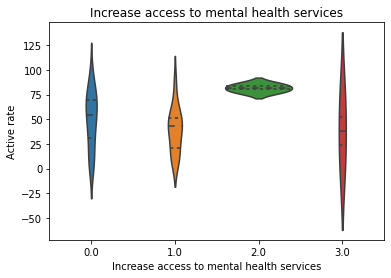

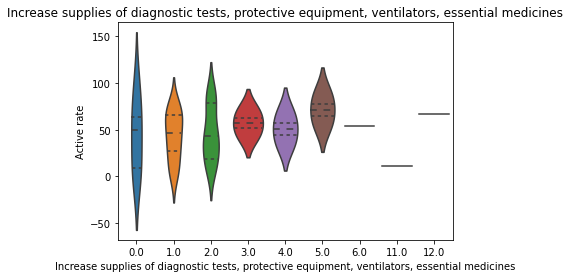

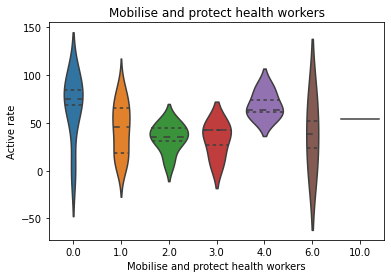

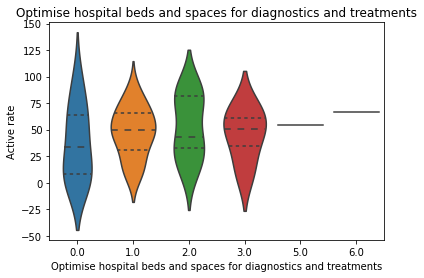

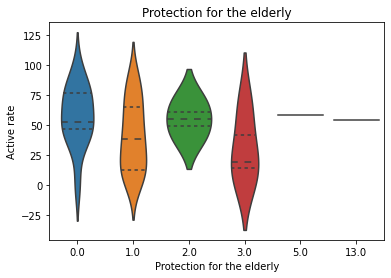

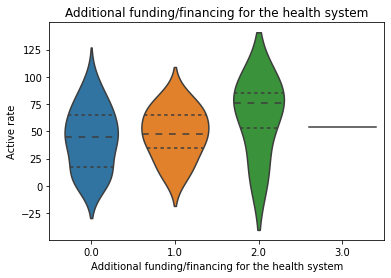

In [0]:
for item in lis:
  sns.violinplot(x=health_policy1[item], y= health_policy1['Active rate'], inner='quartile')
  plt.title(item)
  plt.show() 

## Mobility during COVID -19

Dataset used: https://www.google.com/covid19/mobility/ 

In [0]:
mobility= pd.read_csv('/content/drive/My Drive/Covid data/Global Mobility/Global_Mobility_Report.csv')

In [0]:
temp= mobility.groupby(['date','country_region']).mean(). reset_index()

In [0]:
lis1=[]
lis=temp.columns
lis=lis.drop(['date', 'country_region'])
for item in lis:
  print(item)
  lis1.append(pd.pivot_table(temp,columns='country_region', index='date',values=item))

retail_and_recreation_percent_change_from_baseline
grocery_and_pharmacy_percent_change_from_baseline
parks_percent_change_from_baseline
transit_stations_percent_change_from_baseline
workplaces_percent_change_from_baseline
residential_percent_change_from_baseline


In [0]:
retail_recreation=lis1[0]
grocery_pharma=lis1[1]
parks=lis1[2]
transit_station= lis1[3]
workplace=lis1[4]
residential=lis1[5]

The following plot shows the cumulative active cases and the different mobility percentages such as workplace transit, essentials shopping and recreations in India.

In [0]:
fig=make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x= workplace.index,y=workplace['India'], name='Workplace Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= residential.index,y=residential['India'], name='Residential Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= retail_recreation.index,y=retail_recreation['India'], name='Retail & Recreation Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= transit_station.index,y=transit_station['India'], name='Transit Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= grocery_pharma.index,y=grocery_pharma['India'], name='Grocery & Pharma Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= active_df.index,y=active_df['India'],name='Active Cases',  mode='lines+markers'), secondary_y=True)
fig.update_layout(title_text="Mobility vs active cases in India")
fig.update_yaxes(title_text="Mobility change", secondary_y=False)
fig.update_yaxes(title_text="Active Cases", secondary_y=True)
fig.update_xaxes(title_text="Date")

The following plot shows the cumulative active cases and the different mobility percentages such as workplace transit, essentials shopping and recreations in Spain.

In [0]:
fig=make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x= workplace.index,y=workplace['Spain'], name='Workplace Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= residential.index,y=residential['Spain'], name='Residential Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= retail_recreation.index,y=retail_recreation['Spain'], name='Retail & Recreation Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= transit_station.index,y=transit_station['Spain'], name='Transit Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= grocery_pharma.index,y=grocery_pharma['Spain'], name='Grocery & Pharma Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= active_df.index,y=active_df['Spain'],name='Active Cases',  mode='lines+markers'), secondary_y=True)
fig.update_layout(title_text="Mobility vs active cases in Spain")
fig.update_yaxes(title_text="Mobility change", secondary_y=False)
fig.update_yaxes(title_text="Active Cases", secondary_y=True)
fig.update_xaxes(title_text="Date")

The following plot shows the cumulative active cases and the different mobility percentages such as workplace transit, essentials shopping and recreations in USA.

In [0]:
fig=make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x= workplace.index,y=workplace['United States'], name='Workplace Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= residential.index,y=residential['United States'], name='Residential Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= retail_recreation.index,y=retail_recreation['United States'], name='Retail & Recreation Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= transit_station.index,y=transit_station['United States'], name='Transit Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= grocery_pharma.index,y=grocery_pharma['United States'], name='Grocery & Pharma Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= active_df.index,y=active_df['US'],name='Active Cases', mode='lines+markers'), secondary_y=True)
fig.update_layout(title_text="Mobility vs active cases in USA")
fig.update_yaxes(title_text="Mobility change", secondary_y=False)
fig.update_yaxes(title_text="Active Cases", secondary_y=True)
fig.update_xaxes(title_text="Date")

The following plot shows the cumulative active cases and the different mobility percentages such as workplace transit, essentials shopping and recreations in Germany.

In [0]:
fig=make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x= workplace.index,y=workplace['Germany'], name='Workplace Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= residential.index,y=residential['Germany'], name='Residential Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= retail_recreation.index,y=retail_recreation['Germany'], name='Retail & Recreation Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= transit_station.index,y=transit_station['Germany'], name='Transit Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= grocery_pharma.index,y=grocery_pharma['Germany'], name='Grocery & Pharma Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= active_df.index,y=active_df['Germany'],name='Active Cases', mode='lines+markers'), secondary_y=True)
fig.update_layout(title_text="Mobility vs active cases in GERMANY")
fig.update_yaxes(title_text="Mobility change", secondary_y=False)
fig.update_yaxes(title_text="Active Cases", secondary_y=True)
fig.update_xaxes(title_text="Date")

The following plot shows the cumulative active cases and the different mobility percentages such as workplace transit, essentials shopping and recreations in United Kingdom.

In [0]:
fig=make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x= workplace.index,y=workplace['United Kingdom'], name='Workplace Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= residential.index,y=residential['United Kingdom'], name='Residential Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= retail_recreation.index,y=retail_recreation['United Kingdom'], name='Retail & Recreation Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= transit_station.index,y=transit_station['United Kingdom'], name='Transit Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= grocery_pharma.index,y=grocery_pharma['United Kingdom'], name='Grocery & Pharma Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= active_df.index,y=active_df['UK'],name='Active Cases', mode='lines+markers'), secondary_y=True)
fig.update_layout(title_text="Mobility vs active cases in United Kingdom")
fig.update_yaxes(title_text="Mobility change", secondary_y=False)
fig.update_yaxes(title_text="Active Cases", secondary_y=True)
fig.update_xaxes(title_text="Date")

The following plot shows the cumulative active cases and the different mobility percentages such as workplace transit, essentials shopping and recreations in South Korea.

In [0]:
fig=make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x= workplace.index,y=workplace['South Korea'], name='Workplace Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= residential.index,y=residential['South Korea'], name='Residential Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= retail_recreation.index,y=retail_recreation['South Korea'], name='Retail & Recreation Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= transit_station.index,y=transit_station['South Korea'], name='Transit Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= grocery_pharma.index,y=grocery_pharma['South Korea'], name='Grocery & Pharma Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= active_df.index,y=active_df['South Korea'],name='Active cases',  mode='lines+markers'), secondary_y=True)
fig.update_layout(title_text="Mobility vs active cases in South Korea")
fig.update_yaxes(title_text="Mobility change", secondary_y=False)
fig.update_yaxes(title_text="Active Cases", secondary_y=True)
fig.update_xaxes(title_text="Date")

The following plot shows the cumulative active cases and the different mobility percentages such as workplace transit, essentials shopping and recreations in Vietnam.

In [0]:
fig=make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x= workplace.index,y=workplace['Vietnam'], name='Workplace Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= residential.index,y=residential['Vietnam'], name='Residential Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= retail_recreation.index,y=retail_recreation['Vietnam'], name='Retail & Recreation Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= transit_station.index,y=transit_station['Vietnam'], name='Transit Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= grocery_pharma.index,y=grocery_pharma['Vietnam'], name='Grocery & Pharma Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= active_df.index,y=active_df['Vietnam'],name='Active Cases', mode='lines+markers'), secondary_y=True)
fig.update_layout(title_text="Mobility vs active cases in Vietnam")
fig.update_yaxes(title_text="Mobility change", secondary_y=False)
fig.update_yaxes(title_text="Active Cases", secondary_y=True)
fig.update_xaxes(title_text="Date")

In [0]:
lis1=[]
temp= mobility[mobility['country_region']=='India']
lis=temp.columns
lis=lis.drop(['date', 'country_region','country_region_code','sub_region_1','sub_region_2'])
for item in lis:
  print(item)
  lis1.append(pd.pivot_table(temp,columns='sub_region_1', index='date',values=item))

retail_and_recreation_percent_change_from_baseline
grocery_and_pharmacy_percent_change_from_baseline
parks_percent_change_from_baseline
transit_stations_percent_change_from_baseline
workplaces_percent_change_from_baseline
residential_percent_change_from_baseline


In [0]:
retail_recreation=lis1[0]
grocery_pharma=lis1[1]
parks=lis1[2]
transit_station= lis1[3]
workplace=lis1[4]
residential=lis1[5]

The following plot shows the cumulative active cases and the different mobility percentages such as workplace transit, essentials shopping and recreations in Tamil Nadu.

In [0]:
fig=make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x= workplace.index,y=workplace['Tamil Nadu'], name='Workplace Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= residential.index,y=residential['Tamil Nadu'], name='Residential Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= retail_recreation.index,y=retail_recreation['Tamil Nadu'], name='Retail & Recreation Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= transit_station.index,y=transit_station['Tamil Nadu'], name='Transit Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= grocery_pharma.index,y=grocery_pharma['Tamil Nadu'], name='Grocery & Pharma Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= active_df1.index,y=active_df1['Tamil Nadu'],name='Active Cases',  mode='lines+markers'), secondary_y=True)
fig.update_layout(title_text="Mobility vs active cases in Tamil Nadu")
fig.update_yaxes(title_text="Mobility change", secondary_y=False)
fig.update_yaxes(title_text="Active Cases", secondary_y=True)
fig.update_xaxes(title_text="Date")

The following plot shows the cumulative active cases and the different mobility percentages such as workplace transit, essentials shopping and recreations in Maharashtra.

In [0]:
fig=make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x= workplace.index,y=workplace['Maharashtra'], name='Workplace Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= residential.index,y=residential['Maharashtra'], name='Residential Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= retail_recreation.index,y=retail_recreation['Maharashtra'], name='Retail & Recreation Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= transit_station.index,y=transit_station['Maharashtra'], name='Transit Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= grocery_pharma.index,y=grocery_pharma['Maharashtra'], name='Grocery & Pharma Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= active_df1.index,y=active_df1['Maharashtra'],name='Active Cases',  mode='lines+markers'), secondary_y=True)
fig.update_layout(title_text="Mobility vs active cases in Maharashtra")
fig.update_yaxes(title_text="Mobility change", secondary_y=False)
fig.update_yaxes(title_text="Active Cases", secondary_y=True)
fig.update_xaxes(title_text="Date")

The following plot shows the cumulative active cases and the different mobility percentages such as workplace transit, essentials shopping and recreations in Gujarat.

In [0]:
fig=make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x= workplace.index,y=workplace['Gujarat'], name='Workplace Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= residential.index,y=residential['Gujarat'], name='Residential Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= retail_recreation.index,y=retail_recreation['Gujarat'], name='Retail & Recreation Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= transit_station.index,y=transit_station['Gujarat'], name='Transit Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= grocery_pharma.index,y=grocery_pharma['Gujarat'], name='Grocery & Pharma Mobility'), secondary_y=False)
fig.add_trace(go.Scatter(x= active_df1.index,y=active_df1['Gujarat'],name='Active Cases',  mode='lines+markers'), secondary_y=True)
fig.update_layout(title_text="Mobility vs active cases in Gujarat")
fig.update_yaxes(title_text="Mobility change", secondary_y=False)
fig.update_yaxes(title_text="Active Cases", secondary_y=True)
fig.update_xaxes(title_text="Date")

# Effect of Lockdowns:

## Effect on Air quality:

Dataset : https://aqicn.org/data-platform/covid19/ 

In [0]:
air_quality= pd.read_csv('/content/drive/My Drive/Covid data/Air quality /waqi-covid19-airqualitydata-2020.csv', engine='python',header=4)

In [0]:
air_quality.head()

Date Country     City       Specie  ...   min   max  median  variance
0  2020-03-14      CI  Abidjan  temperature  ...  26.0  31.5    28.0     29.89
1  2020-05-01      CI  Abidjan  temperature  ...  26.5  32.5    28.0     38.70
2  2020-04-20      CI  Abidjan  temperature  ...  28.0  32.0    29.0     21.08
3  2020-04-21      CI  Abidjan  temperature  ...  24.0  32.0    28.0     67.10
4  2020-04-25      CI  Abidjan  temperature  ...  27.0  31.0    28.0     18.39

[5 rows x 9 columns]

In [0]:
air=pd.pivot_table(air_quality,index=['Date','Country'], columns='Specie',values='median', aggfunc='mean').reset_index()

In [0]:
country= pd.read_csv('/content/drive/My Drive/Covid data/Air quality /country-codes_csv.csv', usecols=['CLDR display name','ISO3166-1-Alpha-2','ISO3166-1-Alpha-3'])

In [0]:
air=country.merge(air, left_on='ISO3166-1-Alpha-2',right_on='Country')

In [0]:
air.head()

ISO3166-1-Alpha-2 ISO3166-1-Alpha-3  ... wind-gust wind-speed
0                TW               TWN  ...       NaN        NaN
1                TW               TWN  ...       NaN        NaN
2                TW               TWN  ...       NaN        NaN
3                TW               TWN  ...       NaN        NaN
4                TW               TWN  ...  5.628571   1.111111

[5 rows x 27 columns]

The world map shows the quantity of NO2 present in each country and the colour range shows the intensity of NO2.

In [0]:
fig=px.choropleth(air,locations='ISO3166-1-Alpha-3',color='no2', color_continuous_scale=px.colors.sequential.Purples,hover_name='Country', animation_frame='Date')
fig.update_layout(title='NO2')
fig.show()

The world map shows the quantity of PM25 present in each country and the colour range shows the intensity of PM25.

In [0]:
fig=px.choropleth(air,locations='ISO3166-1-Alpha-3',color='pm25', color_continuous_scale=px.colors.sequential.Reds,hover_name='Country', animation_frame='Date')
fig.update_layout(title='PM25')
fig.show()

The world map shows the quantity of CO present in each country and the colour range shows the intensity of CO.

In [0]:
fig=px.choropleth(air,locations='ISO3166-1-Alpha-3',color='co', color_continuous_scale=px.colors.sequential.Blues,hover_name='Country', animation_frame='Date')
fig.update_layout(title='CO')
fig.show()

The world map shows the quantity of PM10 present in each country and the colour range shows the intensity of PM10

In [0]:
fig=px.choropleth(air,locations='ISO3166-1-Alpha-3',color='pm10', color_continuous_scale=px.colors.sequential.Oranges,hover_name='Country', animation_frame='Date')
fig.update_layout(title='PM10')
fig.show()

The world map shows the quantity of O3 present in each country and the colour range shows the intensity of O3.

In [0]:
fig=px.choropleth(air,locations='ISO3166-1-Alpha-3',color='o3', color_continuous_scale=px.colors.sequential.Greens,hover_name='Country', animation_frame='Date')
fig.update_layout(title='O3')
fig.show()

## Effect of Commodity Prices:

Dataset: https://data.imf.org/?sk=4FFB52B2-3653-409A-B471-D47B46D904B5

In [0]:
commodity_price= pd.read_csv('/content/drive/My Drive/Covid data/Commodity prices/CPI_05-08-2020 14-49-13-19_timeSeries.csv')

In [0]:
commodity_price.head()

Country Name  Country Code  ... Common Reference Period Unnamed: 140
0       Brazil           223  ...                     NaN          NaN
1       Brazil           223  ...                     NaN          NaN
2       France           132  ...                     NaN          NaN
3       France           132  ...                     NaN          NaN
4     Bulgaria           918  ...                   1995A          NaN

[5 rows x 141 columns]

In [0]:
commodity_price= commodity_price.fillna(0)
commodity_price= commodity_price.drop(commodity_price[commodity_price['2020M1'].str.contains('M', na=False)].index)
commodity_price= commodity_price.drop(commodity_price[commodity_price['2020M1'].str.contains('A', na=False)].index)
commodity_price= commodity_price.drop(commodity_price[commodity_price['2020M1'].str.contains('/', na=False)].index)

In [0]:
commodity_price=commodity_price[commodity_price['2020M1']!='definition differs, see metadata']
commodity_price['2020M1']= commodity_price['2020M1'].astype('float')

In [0]:
m1_2020_df= pd.pivot_table(commodity_price,index='Country Name', columns='Indicator Name',values='2020M1')

In [0]:
a=list(m1_2020_df.columns[36::10])
b=list(m1_2020_df.columns[:40:10])
a.extend(b)

In [0]:
m1_2020_df= m1_2020_df[['Education','Food and non-alcoholic beverages','Furnishings, household equipment and routine household maintenance','Health','Housing, Water, Electricity, Gas and Other Fuels',
'Miscellaneous goods and services','Recreation and culture','Restaurants and hotels','Transport','Alcoholic Beverages, Tobacco, and Narcotics','Clothing and footwear','Communication',
'Consumer Price Index, All items']]

In [0]:
commodity_price['2020M2']= commodity_price['2020M2'].astype('float')
m2_2020_df=pd.pivot_table(commodity_price,index='Country Name', columns='Indicator Name',values='2020M2')

m2_2020_df= m2_2020_df[['Education','Food and non-alcoholic beverages','Furnishings, household equipment and routine household maintenance','Health','Housing, Water, Electricity, Gas and Other Fuels',
'Miscellaneous goods and services','Recreation and culture','Restaurants and hotels','Transport','Alcoholic Beverages, Tobacco, and Narcotics','Clothing and footwear','Communication',
'Consumer Price Index, All items']]

In [0]:
commodity_price['2020M3']= commodity_price['2020M3'].astype('float')
m3_2020_df=pd.pivot_table(commodity_price,index='Country Name', columns='Indicator Name',values='2020M2')

m3_2020_df= m3_2020_df[['Education','Food and non-alcoholic beverages','Furnishings, household equipment and routine household maintenance','Health','Housing, Water, Electricity, Gas and Other Fuels',
'Miscellaneous goods and services','Recreation and culture','Restaurants and hotels','Transport','Alcoholic Beverages, Tobacco, and Narcotics','Clothing and footwear','Communication',
'Consumer Price Index, All items']]

In [0]:
m3_2020_df= m3_2020_df.T
m3_2020_df= m3_2020_df[['United States','Spain','Italy','Germany','Canada','United Kingdom']]

In [0]:
m2_2020_df= m2_2020_df.T
m2_2020_df= m2_2020_df[['United States','Spain','Italy','Germany','Canada','United Kingdom']]

In [0]:
m1_2020_df= m1_2020_df.T
m1_2020_df= m1_2020_df[['United States','Spain','Italy','Germany','Canada','United Kingdom']]

The line chart depicts the prices of various commodities during the months of January, February and March 2020 in the countries of United States,Spain, Italy, Germany, Canada, and United Kingdom.

In [0]:
for item in ['United States','Spain','Italy','Germany','Canada','United Kingdom']:
  fig= go.Figure()
  fig.add_trace(go.Scatter(x=m1_2020_df.index,y= m1_2020_df[item], name='Month1'))
  fig.add_trace(go.Scatter(x=m2_2020_df.index,y= m2_2020_df[item], name='Month2'))
  fig.add_trace(go.Scatter(x=m3_2020_df.index,y= m3_2020_df[item], name='Month3'))
  fig.update_layout(title='Price Index in {}'.format(item))
  fig.show()

## Effect on Supply and Demand and effect on differnt occupation

Dataset: https://app.dimensions.ai/details/data_set/12110118 

In [0]:
industry_df=pd.read_csv('/content/drive/My Drive/Covid data/Demand vs Supply/industry_variables_and_shock.csv')

In [0]:
industry_df.head()

NAICS  ... total_shock_include_positive
0   482  ...                    -0.670000
1  3322  ...                    -0.671023
2    55  ...                    -0.000000
3  5614  ...                    -0.248763
4  3331  ...                    -0.594026

[5 rows x 9 columns]

This count plot illustrates the number of different occupations present in different essesntial score ranges.

Text(0.5, 1.0, 'Countplot of Essntial Score Range')

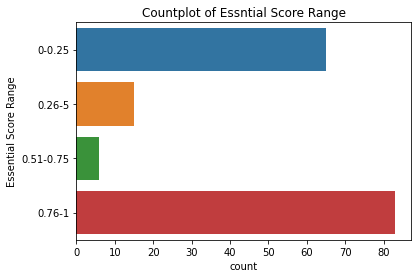

In [0]:
industry_df['Essential Score Range']= pd.cut(industry_df['essential_score'], bins=[-0.5 ,0.25,0.5,0.75,1.05], labels= ['0-0.25','0.26-5','0.51-0.75','0.76-1'])
sns.countplot(y=industry_df['Essential Score Range'])
plt.title('Countplot of Essntial Score Range')

The Strip plot shows the demand shock present in different essential score ranges.

Text(0.5, 1.0, ' Essestial score vs demand shock')

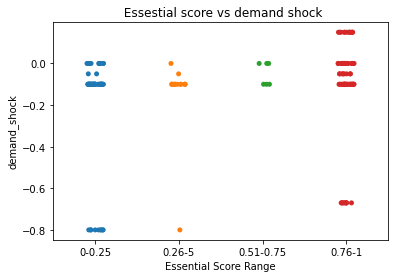

In [0]:
sns. stripplot(x= industry_df['Essential Score Range'], y=industry_df['demand_shock'])
plt.title(' Essestial score vs demand shock')

The Strip plot shows the supply shock present in different essential score ranges.

Text(0.5, 1.0, ' Essestial score vs supply shock')

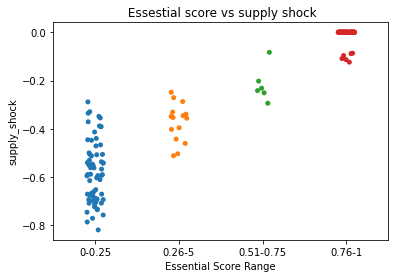

In [0]:
sns. stripplot(x= industry_df['Essential Score Range'], y=industry_df['supply_shock'])
plt.title(' Essestial score vs supply shock')

The Strip plot shows the remote index present in different essential score ranges.

Text(0.5, 1.0, ' Essestial score vs remote index')

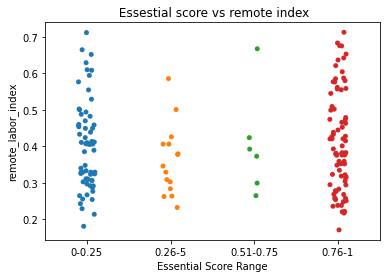

In [0]:
sns. stripplot(x= industry_df['Essential Score Range'], y=industry_df['remote_labor_index'])
plt.title(' Essestial score vs remote index')

## Effect on Inflation:

Dataset: https://data.oecd.org/price/inflation-cpi.htm#indicator-chart 

In [0]:
inflation_df= pd.read_csv('/content/drive/My Drive/Covid data/Inflation/inflation.csv')

In [0]:
inflation_df.head()

LOCATION INDICATOR SUBJECT MEASURE FREQUENCY     TIME     Value  Flag Codes
0      AUT       CPI     TOT  AGRWTH         M  2018-01  1.768173         NaN
1      AUT       CPI     TOT  AGRWTH         M  2018-02  1.762977         NaN
2      AUT       CPI     TOT  AGRWTH         M  2018-03  1.851852         NaN
3      AUT       CPI     TOT  AGRWTH         M  2018-04  1.848249         NaN
4      AUT       CPI     TOT  AGRWTH         M  2018-05  1.943635         NaN

In [0]:
inflation_df=inflation_df.merge(country, left_on='LOCATION', right_on='ISO3166-1-Alpha-3').drop(['ISO3166-1-Alpha-2','ISO3166-1-Alpha-3'], axis=1)

In [0]:
inflation_df=pd.pivot_table(inflation_df, index='TIME', columns='CLDR display name', values='Value')

The line chart shows the inflation in various countries during the period-January 2018 to March 2020.

In [0]:
fig = go.Figure()
# Add traces

for i in inflation_df.columns:
  fig.add_trace(go.Scatter(x=inflation_df.index, y=inflation_df[i] ,mode='lines',name=i))
fig.show()

## Effect on Share Prices

Dataset: https://data.oecd.org/price/share-prices.htm 

In [0]:
share_df=pd.read_csv('/content/drive/My Drive/Covid data/Share Price/share price.csv')

In [0]:
share_df.head()

LOCATION INDICATOR SUBJECT  MEASURE FREQUENCY     TIME     Value  Flag Codes
0      AUS   SHPRICE     TOT  IDX2015         M  2018-03  107.4865         NaN
1      AUS   SHPRICE     TOT  IDX2015         M  2018-04  106.5198         NaN
2      AUS   SHPRICE     TOT  IDX2015         M  2018-05  110.4379         NaN
3      AUS   SHPRICE     TOT  IDX2015         M  2018-06  111.1680         NaN
4      AUS   SHPRICE     TOT  IDX2015         M  2018-07  113.7425         NaN

In [0]:
share_df=share_df.merge(country, left_on='LOCATION', right_on='ISO3166-1-Alpha-3').drop(['ISO3166-1-Alpha-2','ISO3166-1-Alpha-3'], axis=1)

In [0]:
share_df=pd.pivot_table(share_df, index='TIME', columns='CLDR display name', values='Value')

The line chart shows the share prices of various countries during the period-April 2018 to April 2020.

In [0]:
fig = go.Figure()
# Add traces

for i in share_df.columns:
  fig.add_trace(go.Scatter(x=share_df.index, y=share_df[i] ,mode='lines',name=i))
fig.show()